# BREAST CANCER RISK PREDICTION

### PROBLEM ###
__Develop comprehensive survival analysis models and a robust machine learning model to accurately predict 10-year mortality risk for breast cancer patients. By utilizing these models, the institute aims to improve treatment planning, patient counselling, and overall cancer care strategies.__

## Objectives

Predict 10-Year Mortality Risk in Breast Cancer Patients

        Build robust machine learning models to accurately estimate the risk of death within 10 years of diagnosis.

Conduct Survival Analysis

        Use statistical survival models (like Kaplan-Meier and Cox Proportional Hazards) to understand time-to-event data and identify factors influencing survival duration.

Identify Key Prognostic Factors

        Use feature importance and statistical analysis to highlight clinical, pathological, and demographic variables most associated with survival outcomes.

Enhance Clinical Decision-Making

        Support physicians in treatment planning by providing interpretable, data-driven mortality risk predictions.

Improve Patient Counselling

        Enable more personalized, accurate prognostic discussions based on model-driven risk stratification.

In [2]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from lifelines import CoxPHFitter 
from sklearn.preprocessing import StandardScaler  
from sklearn.feature_selection import VarianceThreshold  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



import warnings
warnings.filterwarnings('ignore')



## READ DATASET ##

In [3]:
# Read dataset
df = pd.read_csv("https://raw.githubusercontent.com/Sunny777Solomon/Breast-cancer-Risk-Prediction-streamlit/refs/heads/main/Breast%20Cancer%20METABRIC.csv")

In [4]:
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [5]:
df.describe()
# DATASET DESCRIPTION

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


In [6]:
column_descriptions = {
    "Patient ID": "Unique identifier for each patient.",
    "Type of Breast Surgery": "Type of surgery performed: Mastectomy or Breast Conserving.",
    "Age at Diagnosis": "Age (in years) when the patient was diagnosed with breast cancer.",
    "Cancer Type": "General category of the cancer (e.g., Breast Cancer).",
    "Cancer Type Detailed": "Detailed subtype of breast cancer.",
    "Cellularity": "How dense the cancer cells are: High, Moderate, or Low.",
    "Chemotherapy": "Whether the patient received chemotherapy: Yes or No.",
    "Cohort": "Numeric grouping indicating patient batch or study group.",
    "ER Status": "Estrogen Receptor status: Positive or Negative.",
    "HER2 Status": "HER2 status: Positive or Negative.",
    "Hormone Therapy": "Whether the patient received hormone therapy: Yes or No.",
    "Integrative Cluster": "Molecular subtype from integrative clustering (IntClust 1–10).",
    "Mutation Count": "Total number of gene mutations found in the tumor.",
    "Neoplasm Histologic Grade": "Cancer cell grade (1–3) based on microscopic appearance.",
    "Nottingham Prognostic Index": "Prognostic score based on tumor size, lymph node status, and grade.",
    "Oncotree Code": "OncoTree classification code for the cancer type.",
    "Overall Survival (Months)": "Time in months from diagnosis until death or last follow-up.",
    "Overall Survival Status": "Whether the patient is still living or deceased.",
    "PR Status": "Progesterone Receptor status: Positive or Negative.",
    "Pam50 + Claudin-low subtype": "Molecular subtype (LumA, LumB, Basal, Her2, etc.).",
    "Primary Tumor Laterality": "Left or Right breast.",
    "Radio Therapy": "Whether the patient received radiation therapy.",
    "Sex": "Gender of the patient.",
    "Tumor Size": "Size of the tumor in millimeters.",
    "Tumor Stage": "Stage of the tumor (0–4).",
    "3-Gene classifier subtype": "Subtype classification using three gene markers.",
    "Death From Cancer": "Indicates if death was caused specifically by breast cancer.",
    "Death From Other Causes": "Indicates if death was due to a non-cancer reason.",
    "Lymph Nodes Examined Positive": "Number of lymph nodes found cancer-positive.",
    "Patient Status": "Living or deceased (duplicate of Overall Survival Status).",
    "Relapse Free Status": "Indicates whether the cancer relapsed.",
    "Relapse Free Survival (Months)": "Time in months until relapse or last checkup.",
    "Vital Status": "Indicates if the patient is alive or dead (duplicate)."
}

# Create and view table
column_table = pd.DataFrame(column_descriptions.items(), columns=["Column Name", "Description"])
pd.set_option('display.max_colwidth', None) # Don't truncate column text

column_table

,Column Name,Description
0,Patient ID,Unique identifier for each patient.
1,Type of Breast Surgery,Type of surgery performed: Mastectomy or Breast Conserving.
2,Age at Diagnosis,Age (in years) when the patient was diagnosed with breast cancer.
3,Cancer Type,"General category of the cancer (e.g., Breast Cancer)."
4,Cancer Type Detailed,Detailed subtype of breast cancer.
5,Cellularity,"How dense the cancer cells are: High, Moderate, or Low."
6,Chemotherapy,Whether the patient received chemotherapy: Yes or No.
7,Cohort,Numeric grouping indicating patient batch or study group.
8,ER Status,Estrogen Receptor status: Positive or Negative.
9,HER2 Status,HER2 status: Positive or Negative.


## DATASET OVERVIEW ##

#### DATASET BASIC INFORMATION ####

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

__Number of Entries: The dataset consist of 2509 entries, ranging from index 0 to 2508.__

__Columns: There are 34 columns in the dataset corresponding to various attributes of patients and results of tests.__

__Data Types:  Most of them are object datatype (24 of34).
10 of them are float64.__

__Missing values: Only 5 columns don't have any missing values- patient ID, cancertype , cancer type detailed, oncotree code, sex.
29 columns have missing values.__


 __Based on the data types and the feature explanations,
we can see 3 columns (cohort,neoplasm histologic grade,tumor stage)
are indeed numerical in terms of data type, but categorical in terms of thier schemcatics.
These features should be converted to string (object) data type for proper analysis and interpretation:__

In [8]:
# Define the continuous features
continuous_features = ['Age at Diagnosis',
'Tumor Size',
'Mutation Count',
'Lymph nodes examined positive',
'Nottingham prognostic index',
'Relapse Free Status (Months)',
'Overall Survival (Months)',]

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                             object
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade          object
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         

## Summary Statistics for Numerical Variables ##

In [9]:
# Get the summary statistics for numerical variables
numerical_variables= df.describe().T

numerical_variables

,count,mean,std,min,25%,50%,75%,max
Age at Diagnosis,2498.0,60.420300,13.032997,21.93,50.920000,61.110000,70.000000,96.29
Lymph nodes examined positive,2243.0,1.950513,4.017774,0.00,0.000000,0.000000,2.000000,45.00
Mutation Count,2357.0,5.578702,3.967967,1.00,3.000000,5.000000,7.000000,80.00
Nottingham prognostic index,2287.0,4.028787,1.189092,1.00,3.048000,4.044000,5.040000,7.20
Overall Survival (Months),1981.0,125.244271,76.111772,0.00,60.866667,116.466667,185.133333,355.20
Relapse Free Status (Months),2388.0,108.842487,76.519494,0.00,40.560000,99.095000,167.640000,384.21
Tumor Size,2360.0,26.220093,15.370883,1.00,17.000000,22.410000,30.000000,182.00


### NUMERICAL FEATURES: ### 
#### Age at Diagnosis: ####
Average age of patients at diagnosis is approximately 60.42 years,
with the youngest being 21 and the oldest being 96.
#### Lymph nodes examined positive: ####
Average number of lymph nodes found to be cancer-positive is 1.95,with 0 being the lowest and 45 being the highest.
#### Mutation Count: ####
average mutation count is 5.57 with 1 being the lowest and 80 being the maximum count.
#### Nottingham prognostic index: ####
the average score is 4.02 ,with 1 being the least and 7.20 being the highest.
#### Overall Survival (Months): ####
the average overall survival is 125.24 months, with 0 being the least and 355.20 being the most.
#### Relapse Free Status (Months): ####
the average relapse free status is 108.84 months with 0 being the least and 384.21 being the most.
#### Tumor size: ####
the average tumor size is 26.22 with 1 being the smallest and 182 being the largest.

## GET SUMMARY STATISTICS FOR CATEGORICAL VARIABLES ##

In [10]:
# Get the summary statistics for categorical variables
categorical_variables=df.describe(include='object')

In [11]:
pd.set_option('display.max_columns', None)

categorical_variables

,Patient ID,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Oncotree Code,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Stage,Patient's Vital Status
count,2509,1955,2509,2509,1917,1980,1980,2498.0,2426,2469,2388.0,1980,1980,2374,1980,1980,1980,1870,2509,1981,1980,1980,2488,2509,1764,1788.0,1980
unique,2509,2,2,8,3,2,7,9.0,2,2,3.0,4,2,8,2,2,11,2,8,2,2,2,2,1,4,5.0,3
top,MB-0000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,8,Left,IDC,Deceased,Positive,Yes,Not Recurred,Female,ER+/HER2- Low Prolif,2.0,Living
freq,1,1170,2506,1865,965,1568,700,809.0,1817,1825,1198.0,1436,1733,1810,1216,1556,299,973,1865,1144,1040,1173,1486,2509,640,979.0,837


## CATEGORICAL FEATURES ##

#### Patient ID : ####	
Unique identifier for each patient.

#### Type of Breast Surgery : #### 
Two unique types are breast surgery are present, the most common type is Mastectomy with a frquency of 1170.

#### Cancer Type : ####
There are two unique types of cancer, with the most common type being Breast cancer with a frquency of 2506.

#### Cancer Type Detailed : ####
There are 8 unique results here. Breast Invasive Ductal Carcinoma being the most common with a frequency of 1865.

#### Cellularity : ####
There are three unique types, with High cellularity being the most frequent with 965.

#### Chemotherapy : #### 
There are two unique results with Yes or No, with No being the most common with a frequency of 1568.

#### Pam50 + Claudin-low subtype : ####
There are seven unique types of subtypes, with LumA being the most common with a frequency of 700.

#### Cohort : ####
there are Nine unique results(1.0-9.0), with 1.0 being the most common type with a frquency of 809.

#### ER status measured by IHC : #### 
There are two unique types(Positive or Negative), with Positive being the most common result with a frequency of 1817.

#### ER Status : ####
There are two unique types(Positive or Negative), with Positive being the most common with a frequency of 1825.

#### Neoplasm Histologic Grade : ####
There are three unique types(1-3),with 3 being the most common grade with a frequency of 1198.

#### HER2 status measured by SNP6 : ####
There are 4 unique types 


#### HER2 Status : ####
There are two unique types.(Positive or Negative), with negative being the most common result with a frequency of 1733.

#### Tumor Other Histologic Subtype : ####
There are 8 unique types of subtypes, with the most common type being Ductal/NST with a frequency of 1810.

#### Hormone Therapy : ####
There are two unique types(Yes or No), with Yes being the most common type with a frequency of 1216.

#### Inferred Menopausal State : ####
There are two unique types(Pre or Post), with Post being the most common state with a frequency of 1556.

#### Integrative Cluster : ####
There are 11 types , with type 8  being the most common type with a frequency of 299.

#### Primary Tumor Laterality : ####
There are two unique types(Left or Right), with Left being the most common type with a frequency of 973.

#### Oncotree Code : ####
There are 8 unique kind , with IDC being the most common type with a frequency of 1865.

#### Overall Survival Status : ####
There are two unique results, with Deceased being the most common result with a frequency of 1144.

#### PR Status : ####
There are two unique types, with Psitive being the most common type with a frequency of 1040.

#### Radio Therapy : ####
There are two options(Yes or No), with Yes being the most common type with a frequency of 1179.

#### Relapse Free Status : ####
There are two unique types (recurred or not recurred), with Not recurred being the most common with a frequency of 1486.

#### Sex : ####
There is only 1 unique type which is Female.

#### 3-Gene classifier subtype : ####
There are 4 unique types, with ER+/HER2- Low Prolif being the most common subtype with a frequency of 640.

#### Tumor Stage : ####
There are 5 unique stages, with 2 being the most common type with a frequency of 979.

#### Patient's Vital Status : ####
There are 3 unique results, with Living being the most common kind with a frequency of 837.

## EDA ##

#### For our Exploratory Data Analysis (EDA), we'll take it in two main steps: ####

    1. Univariate Analysis: Here, we'll focus on one feature at a time to understand its distribution and range.

    2. Bivariate Analysis: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: predicting the target variable.


### Univariate Analysis ###



We undertake univariate analysis on the dataset's features, based on their datatype:

    For continuous data: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

    For categorical data: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.


### NUMERICAL VARIABLES UNIVARIATE ANALYSIS ###

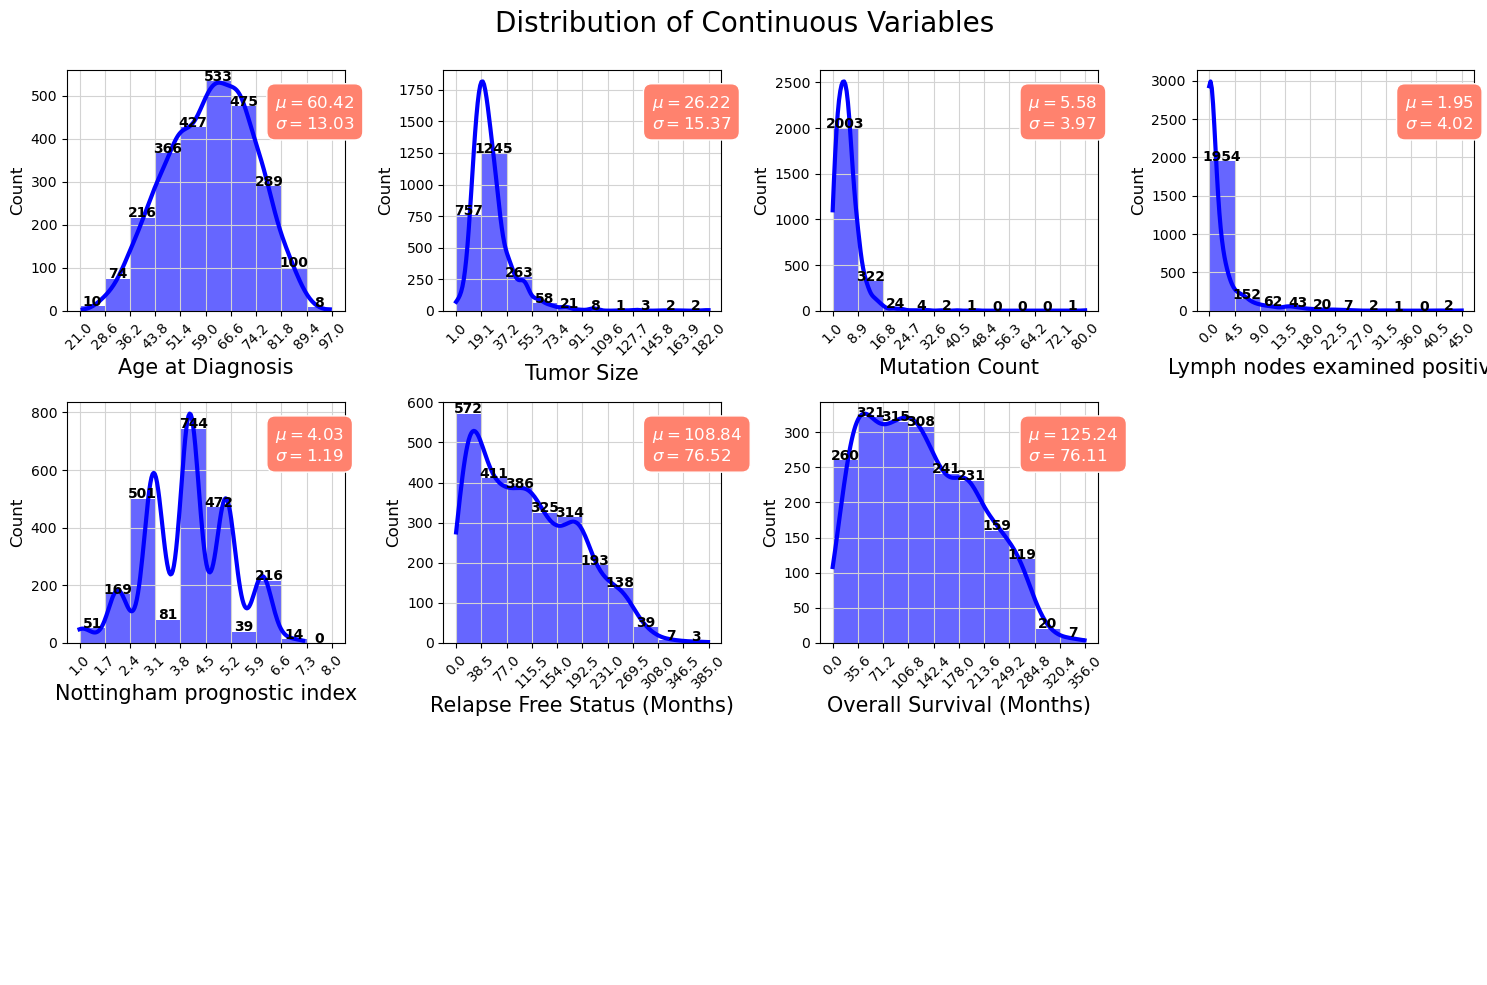

In [12]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Count how many plots we need
numerical_features = len(df_continuous.columns)

# Calculate rows needed (2 rows, 3 columns can fit 6 features)
rows = 3
cols = 4

# Set up the subplot
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    # Skip if we've plotted all features
    if i >= rows * cols:
        break
        
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[i],
                         edgecolor='none', color='Blue', alpha=0.6, line_kws={'lw': 3})
    ax[i].set_xlabel(col, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xticks(np.round(bin_edges, 1))
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation=45)
    ax[i].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[i].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[i].text(0.75, 0.9, textstr, transform=ax[i].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Hide any unused subplots
for j in range(i+1, rows*cols):
    ax[j].axis('off')

plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## INFERENCES : ##


    Age at Diagnosis: The distribution is approximately normal with most patients diagnosed between the ages of 45 and 75. The mean age is 60.42 years with a standard deviation of 13.03 years.

    Tumor Size: The distribution is right-skewed. Most tumors are small, concentrated below 40 mm, but a few cases extend above 100 mm. The mean tumor size is 26.22 mm with a standard deviation of 15.37 mm.

    Mutation Count: The distribution is highly right-skewed. Most patients have fewer than 10 mutations. The mean mutation count is 5.58 with a standard deviation of 3.97.

    Lymph Nodes Examined Positive: This feature shows a steep right-skew. The majority of patients have 0 to 3 positive nodes. The mean is 1.95 with a standard deviation of 4.02, indicating some patients have significant nodal involvement.

    Nottingham Prognostic Index (NPI): The distribution is multimodal, suggesting different risk subgroups. Peaks occur around NPI values of 3, 4, and 5. The mean NPI is 4.03 with a standard deviation of 1.19.

    Relapse-Free Status (Months): This is right-skewed, with many patients remaining relapse-free under 100 months. A small portion shows long-term remission. The mean is 108.84 months with a standard deviation of 76.52 months.

    Overall Survival (Months): The distribution is moderately right-skewed. A significant portion of patients survive 50–150 months, with some surviving well beyond that. The mean overall survival is 125.24 months with a standard deviation of 76.11 months.

## CATEGORICAL VARIABLES UNIVARIATE ANALYSIS ##

In [13]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]
categorical_features

Index(['3-Gene classifier subtype', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Cohort', 'ER Status',
       'ER status measured by IHC', 'HER2 Status',
       'HER2 status measured by SNP6', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Neoplasm Histologic Grade', 'Oncotree Code', 'Overall Survival Status',
       'PR Status', 'Pam50 + Claudin-low subtype', 'Patient ID',
       'Patient's Vital Status', 'Primary Tumor Laterality', 'Radio Therapy',
       'Relapse Free Status', 'Sex', 'Tumor Other Histologic Subtype',
       'Tumor Stage', 'Type of Breast Surgery'],
      dtype='object')

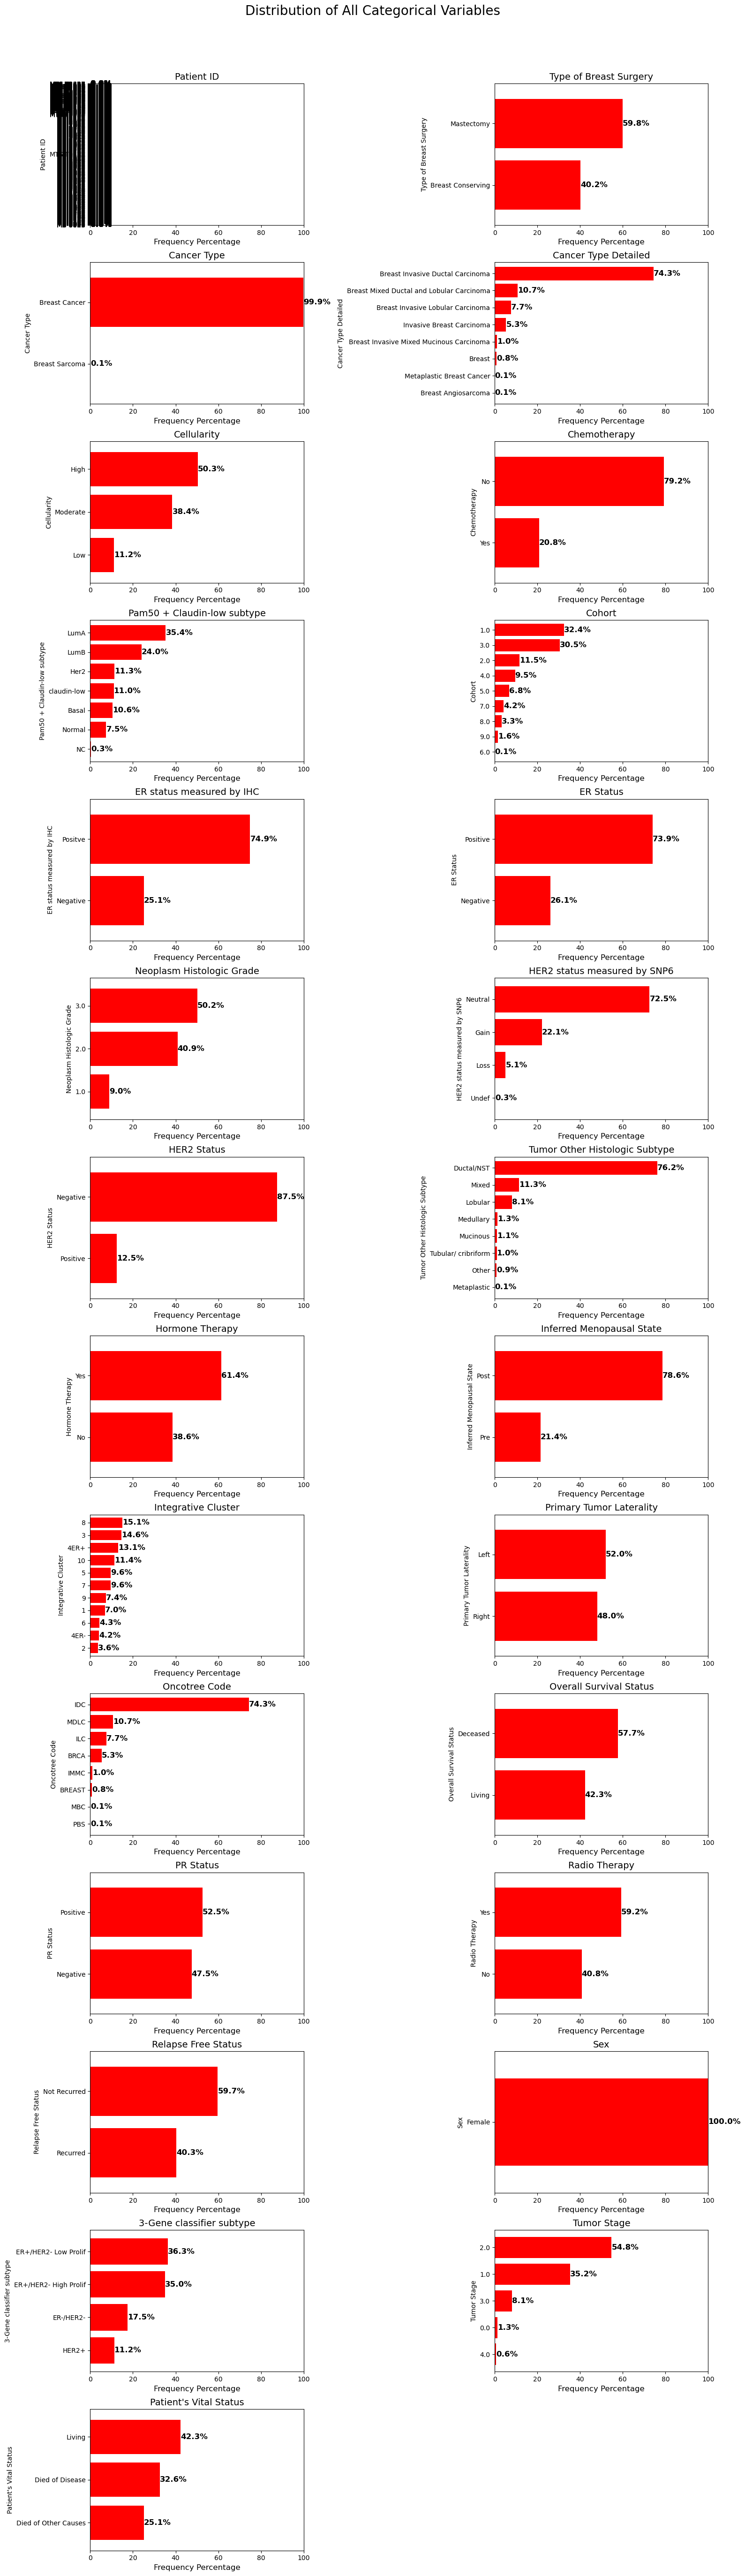

In [14]:


# Get all categorical columns
categorical_features = df.select_dtypes(include='object').columns.tolist()
n_features = len(categorical_features)

# Determine layout (e.g., 2 columns)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 4))

# Flatten axes for easier indexing if needed
ax = ax.flatten()

# Loop through all categorical features
for i, col in enumerate(categorical_features):
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    value_counts.plot(kind='barh', ax=ax[i], width=0.8, color='red')
    
    # Add labels
    for index, value in enumerate(value_counts):
        ax[i].text(value, index, f'{value:.1f}%', fontsize=12, weight='bold', va='center')

    ax[i].set_xlim([0, 100])
    ax[i].set_xlabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=14)
    ax[i].tick_params(axis='y', labelsize=10)

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.suptitle('Distribution of All Categorical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## INFERENCES: ##

#### Type of Breast Surgery: #### 

        Mastectomy (59.8%) is more common than Breast Conserving Surgery (40.2%), suggesting a preference or clinical indication toward more extensive surgery.

####  Cancer Type: #### 

        Breast Cancer overwhelmingly dominates (99.9%), while Breast Sarcoma is extremely rare (0.1%).

####  Cancer Type Detailed: #### 

        Breast Invasive Ductal Carcinoma is the most prevalent subtype (74.3%), followed by Mixed Ductal and Lobular (10.7%) and Lobular Carcinoma (7.7%).

####  Cellularity: #### 

        Most tumors have High (50.3%) or Moderate (38.4%) cellularity, indicating actively proliferating tumor cells. Low cellularity is less common (11.2%).

####  Chemotherapy: #### 

        A significant portion of patients did not receive chemotherapy (79.2%), while 20.8% did, which could reflect clinical staging or hormone receptor status.

####  Pam50 + Claudin-low Subtype: #### 

        LumA (35.4%) and LumB (24.0%) are the dominant molecular subtypes. Other subtypes like Her2, Basal, and Claudin-low are less frequent but still significant (~10–11%).

####  Cohort Distribution: #### 

        Cohort 1 and 3 contribute the largest shares (32.4% and 30.5%, respectively), suggesting batch effects might need to be considered.

####  ER Status (IHC): #### 

        ER Positive (74.9%) is much more common than ER Negative (25.1%), indicating a majority may benefit from hormone therapy.

#### Neoplasm Histologic Grade: #### 

        Most tumors are Grade 2 (50.2%) or Grade 3 (40.9%), suggesting intermediate to high aggressiveness. Grade 1 is rare (9.0%).

####  HER2 Status (SNP6): #### 

        Neutral (72.5%) is the majority status. HER2 Gain (22.1%) and Loss (5.1%) are less frequent, implying HER2 amplification is relatively rare.

####  HER2 Status (IHC): #### 

        HER2 Negative (87.5%) dominates the dataset, with only 12.5% testing positive.

####  Hormone Therapy: #### 

        61.4% received hormone therapy, aligning with the high ER+ status. 38.6% did not receive it, possibly due to receptor negativity or clinical decisions.

####  Inferred Menopausal State: #### 

        Majority of patients are postmenopausal (78.6%), which can influence treatment strategy and prognosis.

####  Tumor Other Histologic Subtype: #### 

        Ductal/NST (76.2%) is the most common histologic pattern, followed by Mixed (11.3%) and Lobular (8.1%).

####  Integrative Cluster: #### 

        Clusters 8, 3, 4ER+ are the most common (each ~13–15%), suggesting a range of molecular diversity in the cohort.

####  Primary Tumor Laterality: #### 

        Slightly more tumors were located on the left breast (52%) than the right (48%), though distribution is nearly balanced.

####  Oncotree Code: #### 

        IDC (74.3%) is the most frequent, reinforcing earlier findings. MDLC (10.7%) and ILC (7.7%) follow.

####  Overall Survival Status: #### 

        57.7% of patients are deceased, while 42.3% are living, which could reflect an advanced cohort or long-term follow-up.

####  PR Status: #### 

        PR Positive (52.5%) is slightly more frequent than PR Negative (47.5%), often correlating with ER status.

####  Radio Therapy: #### 

        59.2% received radiotherapy, a common post-surgical adjuvant treatment; 40.8% did not.

####  Relapse Free Status: #### 

        59.7% did not experience relapse, while 40.3% did—indicating substantial recurrence rates.

####  Sex: #### 

        100% Female, as expected for breast cancer-focused cohorts.

####  3-Gene Classifier Subtype: #### 

        ER+/HER2− Low Prolif (36.3%) and High Prolif (35%) are the major categories, followed by ER−/HER2− (17.5%) and HER2+ (11.2%).

####  Tumor Stage: #### 

        Stage 2 (54.8%) is most prevalent, followed by Stage 1 (35.2%), while Stage 3–4 are relatively rare (under 10% combined).

####  Patient’s Vital Status: #### 

        42.3% Living, 32.6% Died of Disease, and 25.1% Died of Other Causes, highlighting the burden of disease-related mortality.

## BIVARIATE ANALYSIS ##

#### For our bivariate analysis on the dataset's features with respect to the target variable: #### 

For continuous data: I am going to use bar plots to showcase the average value of each feature for the different target classes, 
    #and KDE plots to understand the distribution of each feature across the target classes.
    #This aids in discerning how each feature varies between the two target outcomes.

For categorical data: I am going to employ 100% stacked bar plots to depict the proportion of each category across the target classes. 
    
    This offers a comprehensive view of how different categories within a feature relate to the target.


### NUMERICAL FEATURES VS TARGET ###

I am going to visualize each continuous feature against the target using two types of charts:

    Bar plots - showing the mean values.
    KDE plots - displaying the distribution for each target category.



In [15]:
# 1. First, make a copy of the dataset
df = df.copy()

# 2. Create binary target: 1 = died within 10 years, 0 = survived longer
df["10_Year_Mortality"] = (
    (df["Patient's Vital Status"].str.contains("Died", na=False)) &
    (df["Relapse Free Status (Months)"] <= 120)
).astype(int)

target="10_Year_Mortality"

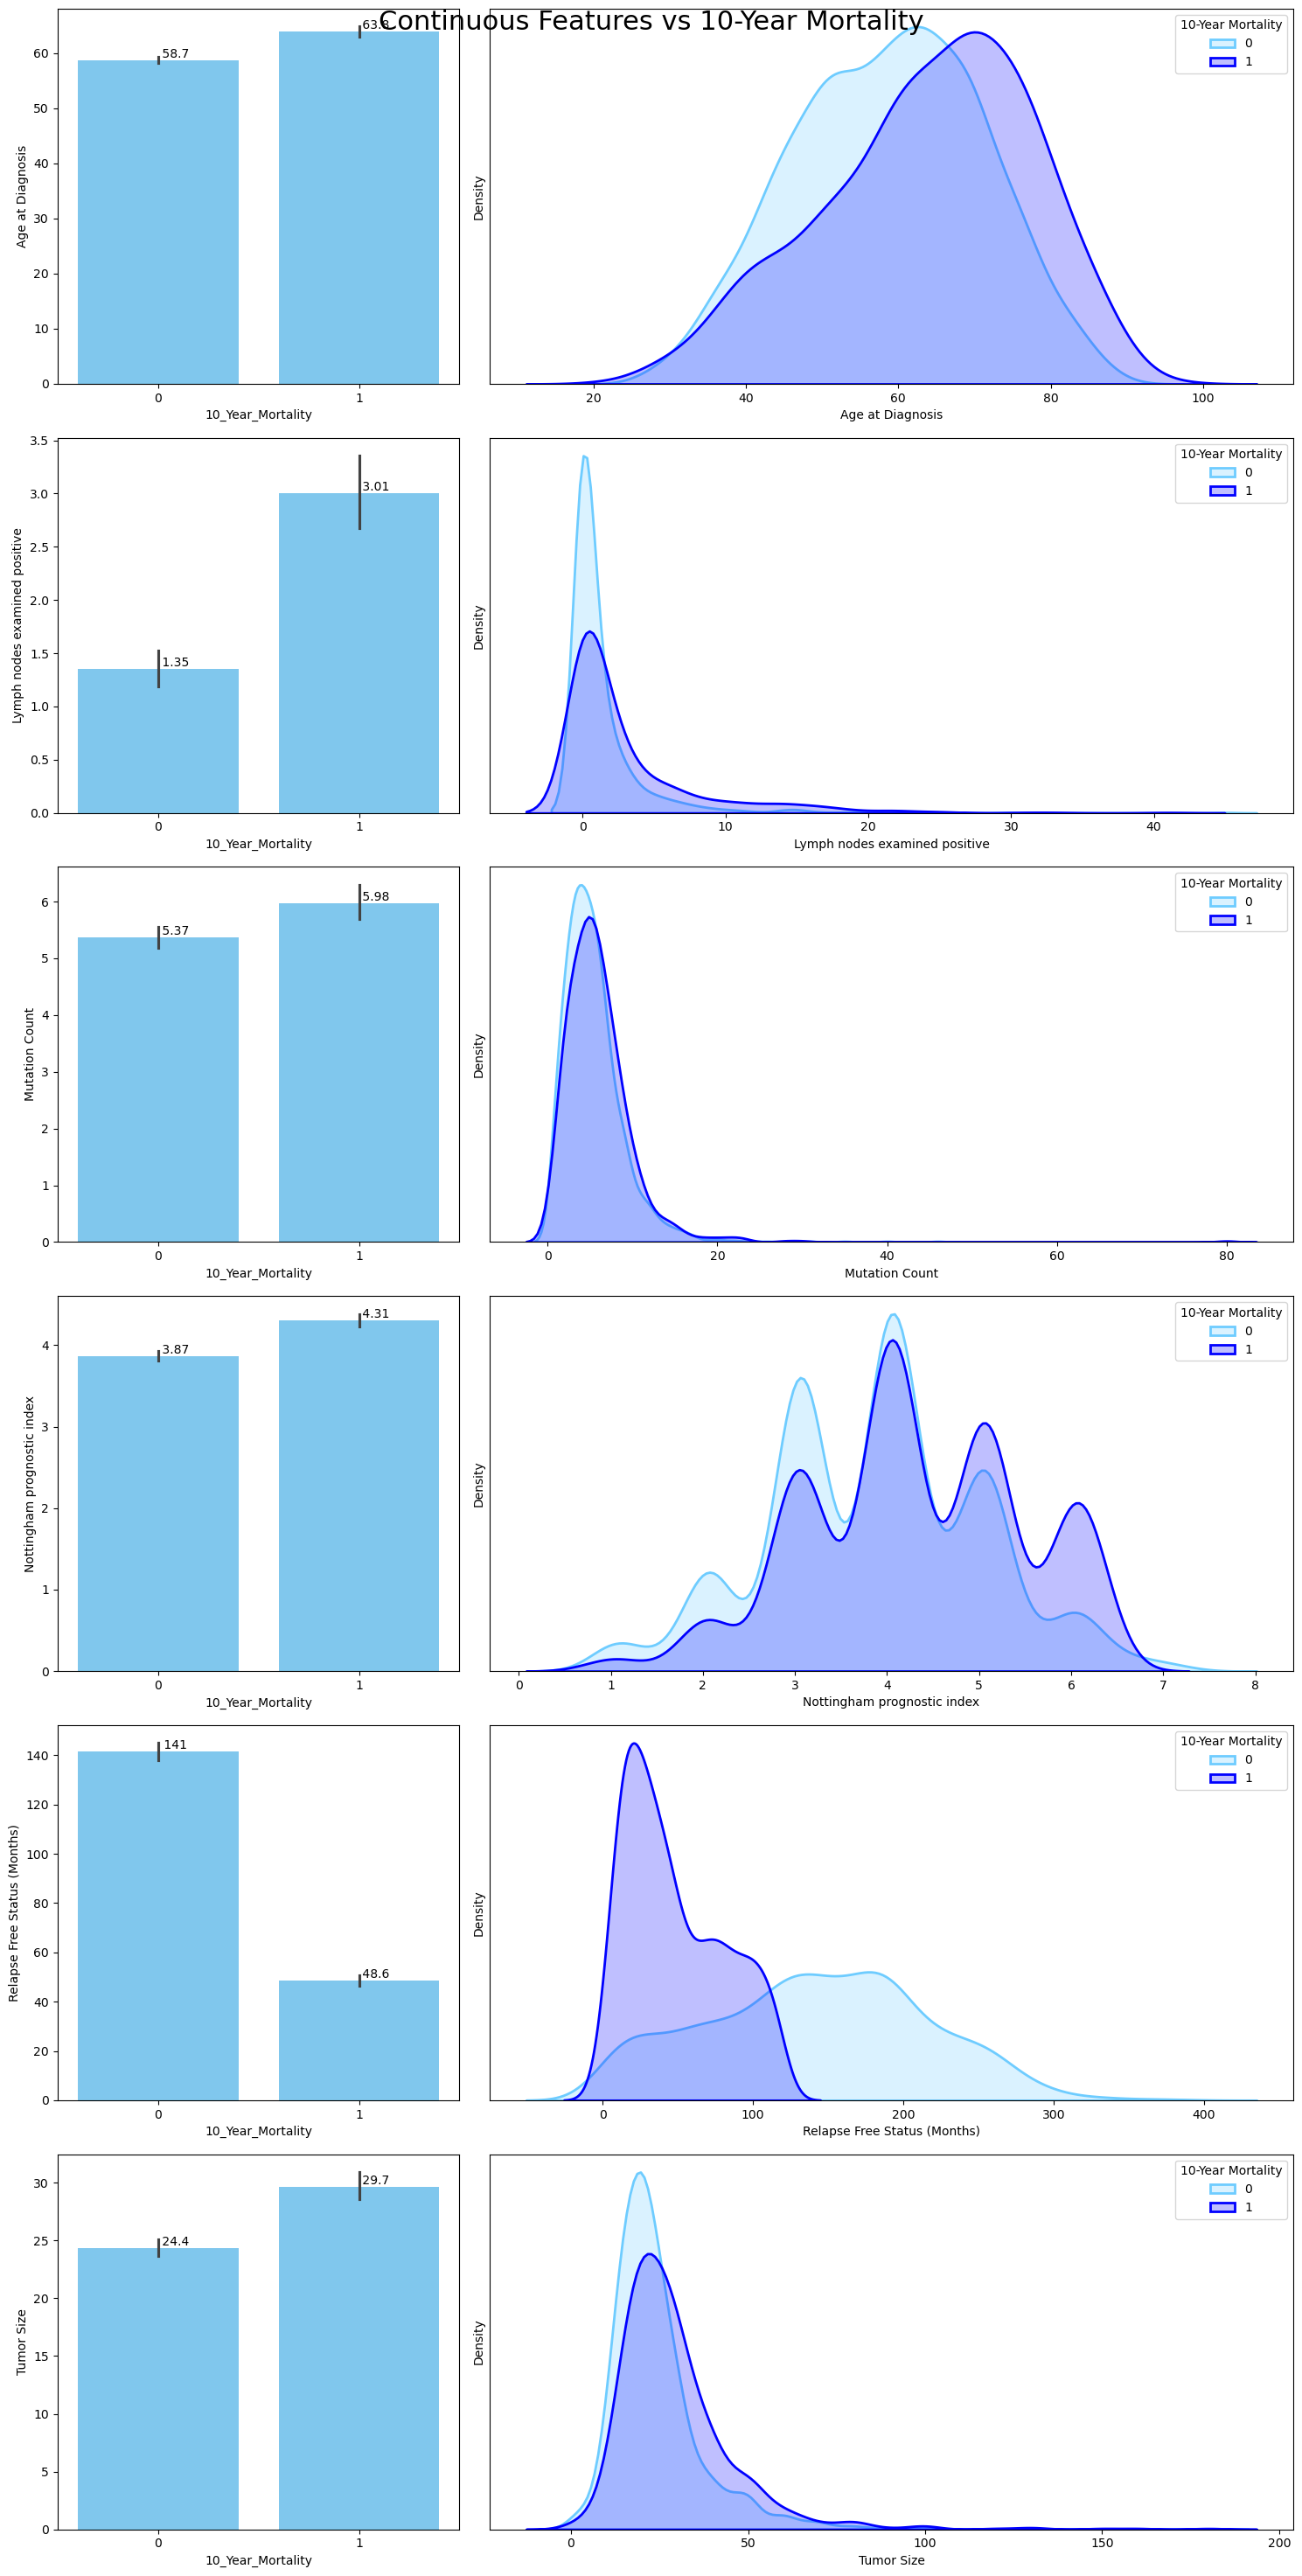

In [16]:
# Step 4.2.1 | Numerical Features vs Target
continuous_features = [
    'Age at Diagnosis', 'Lymph nodes examined positive', 
    'Mutation Count', 'Nottingham prognostic index', 
    'Relapse Free Status (Months)', 'Tumor Size'
]

# Set color palette
sns.set_palette(['#6eccff', 'blue'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 5 * len(continuous_features)), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="10_Year_Mortality", y=col, ax=ax[i, 0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["10_Year_Mortality"] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='0')
    sns.kdeplot(data=df[df["10_Year_Mortality"] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='1')
    
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='10-Year Mortality', loc='upper right')
    
    # Add mean labels to barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set a main title
plt.suptitle('Continuous Features vs 10-Year Mortality', fontsize=22)
plt.tight_layout()
plt.show()

### INFERENCES : ###
Age at Diagnosis (age_at_diagnosis):
Patients who died within 10 years tend to be older, with a mean age of about 63.5 years compared to 58.7 years for survivors. The KDE distribution shows a rightward shift for the mortality group, suggesting that increased age is associated with higher 10-year mortality.

Lymph Nodes Examined Positive (lymph_nodes_examined_positive):
There's a marked difference between the two groups. The average number of positive lymph nodes for deceased patients is over twice that of survivors (3.01 vs. 1.35). The KDE plot also shows a heavier tail for the mortality group, indicating that a higher number of positive nodes strongly correlates with mortality risk.

Mutation Count (mutation_count):
Though both groups have similar distributions, the mean mutation count is slightly higher for those who died (5.98 vs. 5.37). This may hint at a weak trend where increased mutation burden could contribute to poorer outcomes, but the effect appears modest.

Nottingham Prognostic Index (nottingham_prognostic_index):
Non-survivors show higher average NPI scores (4.31 vs. 3.87). The distribution of values for the deceased group shows a broader spread toward higher indices, which supports the clinical validity of the NPI as a predictive factor for poor prognosis.

Relapse-Free Status (relapse_free_status):
A striking difference is evident here. Survivors have a much longer relapse-free period (141 months on average) compared to just 48.6 months for those who died. The KDE shows a clear left shift for the mortality group, reinforcing that shorter relapse-free time is highly associated with increased mortality.

Tumor Size (tumor_size):
Larger tumors are more common in patients who died within 10 years. The average tumor size is about 29.7 mm for deceased patients, compared to 24.4 mm for survivors. The density plot reveals a rightward shift, indicating tumor size as a meaningful indicator of long-term mortality risk.

## CATEGORICAL FEATURES VS TARGET ##



I am going to display 100% stacked bar plots for each categorical feature illustrating the proportion of each category across the two target classes, complemented by the exact counts and percentages on the bars.


In [17]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

In [18]:
categorical_features

['Patient ID',
 'Type of Breast Surgery',
 'Cancer Type',
 'Cancer Type Detailed',
 'Cellularity',
 'Chemotherapy',
 'Pam50 + Claudin-low subtype',
 'Cohort',
 'ER status measured by IHC',
 'ER Status',
 'Neoplasm Histologic Grade',
 'HER2 status measured by SNP6',
 'HER2 Status',
 'Tumor Other Histologic Subtype',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Primary Tumor Laterality',
 'Oncotree Code',
 'Overall Survival Status',
 'PR Status',
 'Radio Therapy',
 'Relapse Free Status',
 'Sex',
 '3-Gene classifier subtype',
 'Tumor Stage',
 "Patient's Vital Status"]

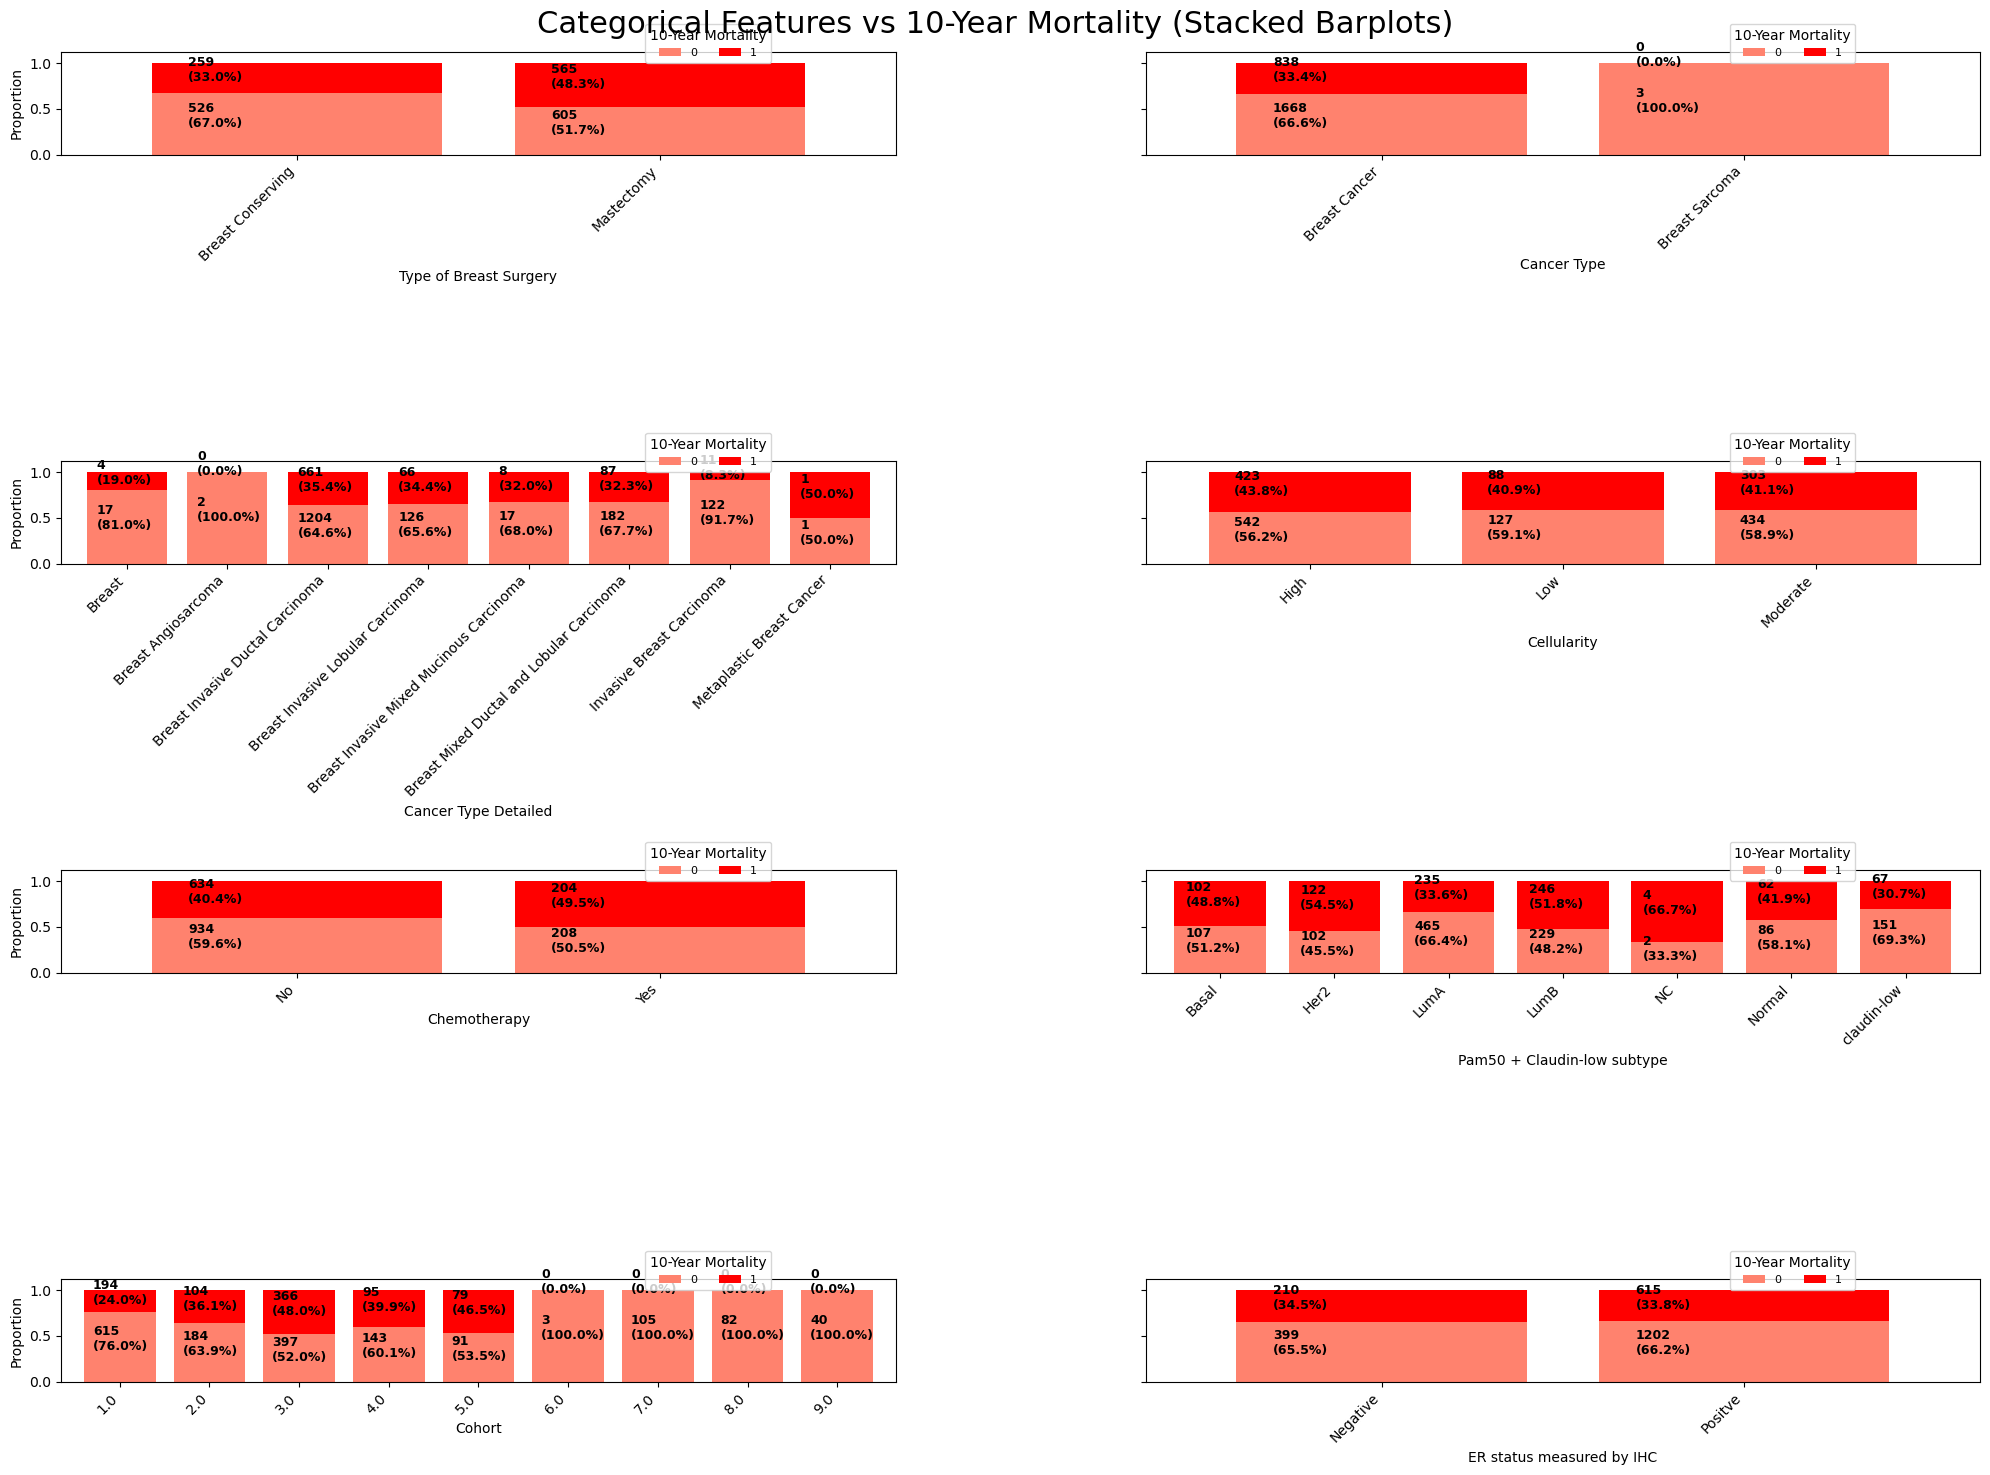

In [19]:
# Set up subplot grid size
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Ensure we only process up to 8 features (the number of subplots available)
for i, col in enumerate(categorical_features[1:9]):
    
    # Cross tab with absolute count
    cross_tab = pd.crosstab(index=df[col], columns=df['10_Year_Mortality'])
    
    # Cross tab with proportions (normalized)
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['10_Year_Mortality'], normalize='index')

    # Color map
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot directly using the flattened index
    cross_tab_prop.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add value labels
    for idx, val in enumerate(cross_tab.index):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[i].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                      s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                      color='black', fontsize=9, fontweight='bold')
    
    ax[i].legend(title='10-Year Mortality', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[i].set_ylim([0, 1.12])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha = 'right')

# Title and layout
plt.suptitle('Categorical Features vs 10-Year Mortality (Stacked Barplots)', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(hspace=3, wspace=0.3)
plt.show()

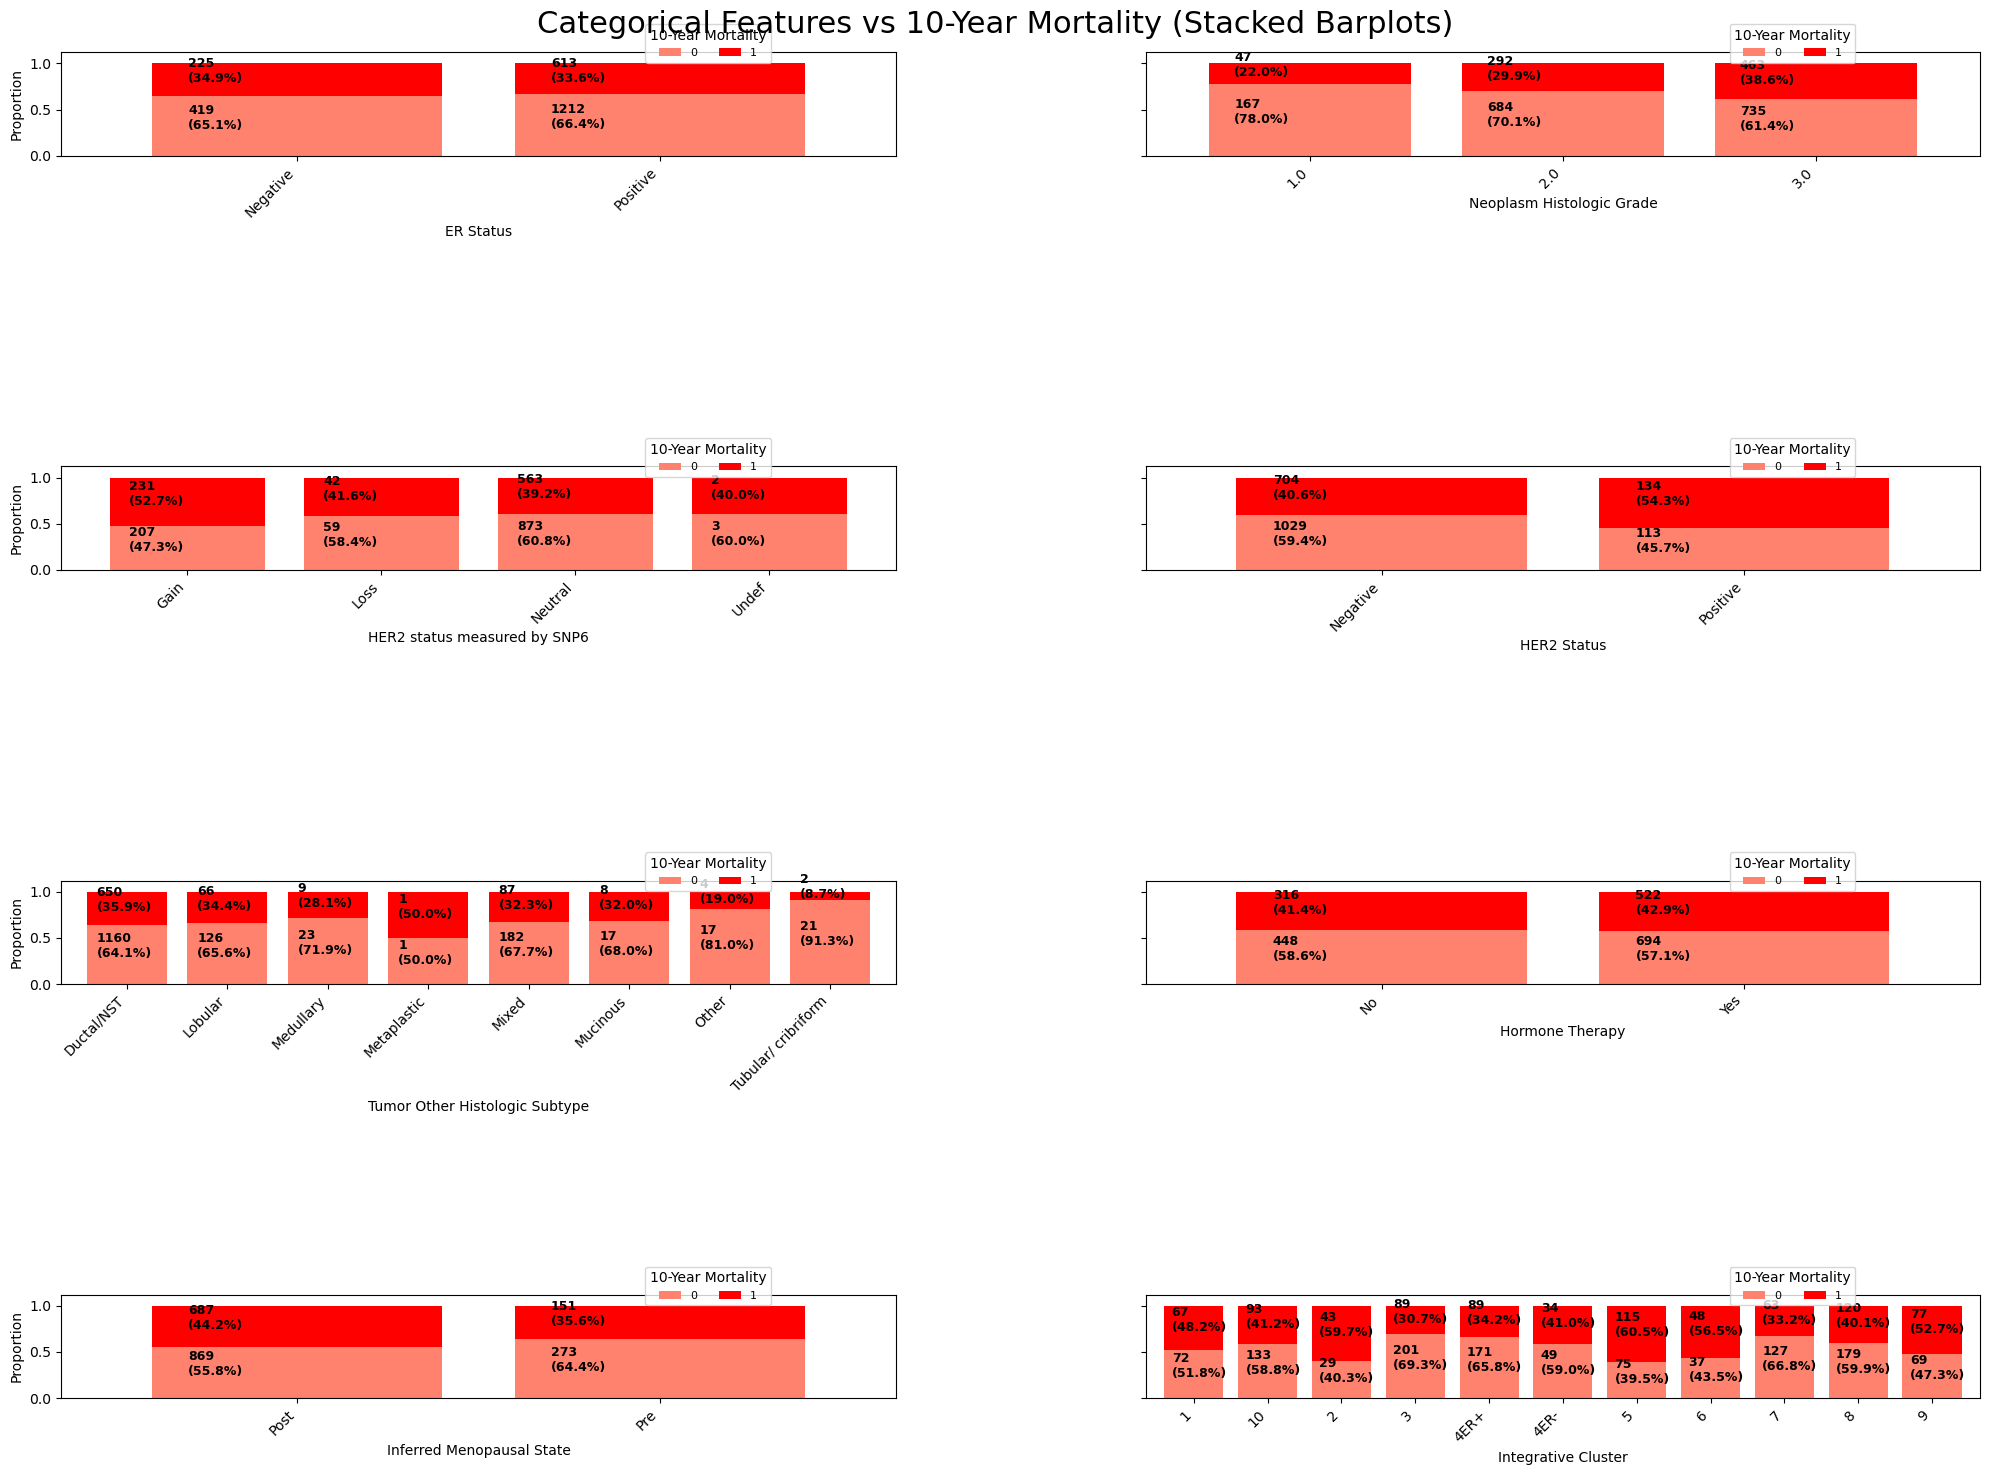

In [20]:
# Set up subplot grid size
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Ensure we only process up to 8 features (the number of subplots available)
for i, col in enumerate(categorical_features[9:17]):
    
    # Cross tab with absolute count
    cross_tab = pd.crosstab(index=df[col], columns=df['10_Year_Mortality'])
    
    # Cross tab with proportions (normalized)
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['10_Year_Mortality'], normalize='index')

    # Color map
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot directly using the flattened index
    cross_tab_prop.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add value labels
    for idx, val in enumerate(cross_tab.index):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[i].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                      s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                      color='black', fontsize=9, fontweight='bold')
    
    ax[i].legend(title='10-Year Mortality', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[i].set_ylim([0, 1.12])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha = 'right')

# Title and layout
plt.suptitle('Categorical Features vs 10-Year Mortality (Stacked Barplots)', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(hspace=3, wspace=0.3)
plt.show()

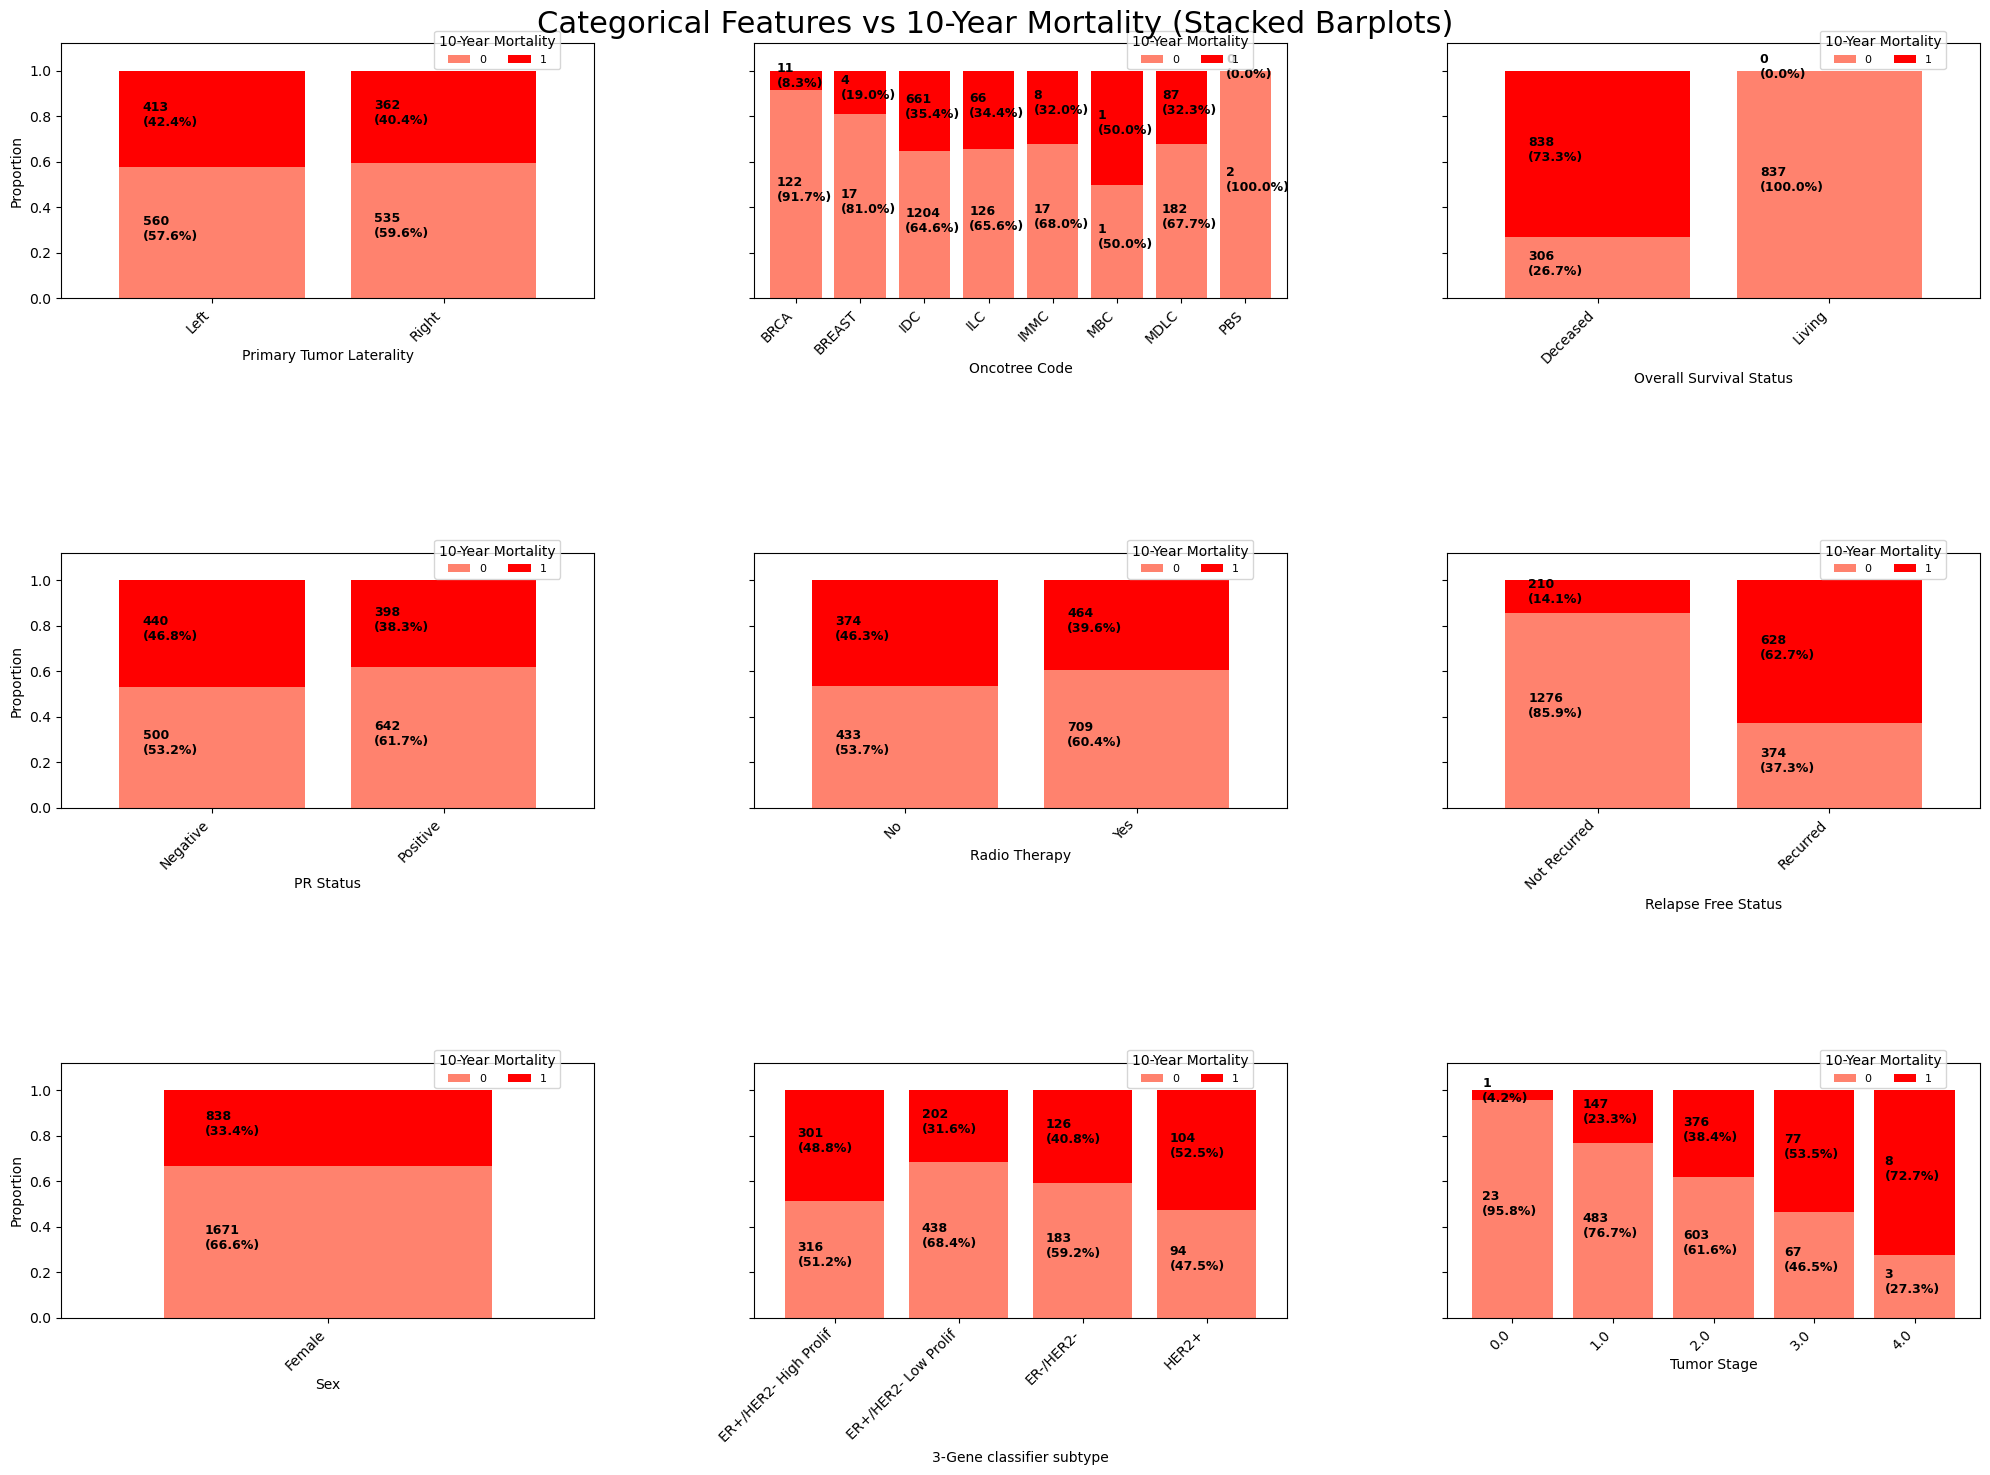

In [21]:
# Set up subplot grid size
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Ensure we only process up to 8 features (the number of subplots available)
for i, col in enumerate(categorical_features[17:26]):
    
    # Cross tab with absolute count
    cross_tab = pd.crosstab(index=df[col], columns=df['10_Year_Mortality'])
    
    # Cross tab with proportions (normalized)
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['10_Year_Mortality'], normalize='index')

    # Color map
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot directly using the flattened index
    cross_tab_prop.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add value labels
    for idx, val in enumerate(cross_tab.index):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[i].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                      s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                      color='black', fontsize=9, fontweight='bold')
    
    ax[i].legend(title='10-Year Mortality', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[i].set_ylim([0, 1.12])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha = 'right')

# Title and layout
plt.suptitle('Categorical Features vs 10-Year Mortality (Stacked Barplots)', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.show()

INFERENCES :
1. Type of Breast Surgery:

    Mastectomy patients show a slightly higher proportion of 10-year mortality ~48.3% compared to those with Breast-Conserving surgery ~33.0%.

    Suggests that more invasive surgery could be linked with more severe underlying conditions or later stages of cancer.

2. Cancer Type:

    Breast Sarcoma cases show 100% survival, but the count is very low.

    Breast Cancer has a moderate mortality rate ~33.4% , indicating it's the primary type studied here.

3. Cancer Type Detailed:

    Metaplastic Breast Cancer has the highest 10-year mortality rate ~50% , indicating a worse prognosis.

    Other types like Invasive Ductal Carcinoma and Mixed Ductal and Lobular Carcinoma show relatively moderate mortality.

4. Cellularity:

    Low cellularity corresponds with higher mortality ~40.9% compared to High and Moderate.

    Indicates a potential link between cell density and prognosis.

5. Chemotherapy:

    Patients who underwent chemotherapy had slightly higher mortality ~50.3% compared to those who didn’t ~40.5%.

    Likely reflects that more severe cases required chemotherapy.

6. PAM50 + Claudin-low subtype:

    Normal-like and Claudin-low subtypes show the highest mortality ~60.7% and ~60.3% respectively.

    Luminal A shows lower mortality, suggesting a more favorable outcome.

7. Cohort:

    Cohorts 7.0–9.0 show 100% survival, though they have very low sample sizes.

    Cohorts 1.0 and 3.0 show higher mortality ~42–44%, indicating some cohort-specific differences in outcomes.

8. ER Status (IHC):

    Negative ER status has higher mortality ~34.9% compared to Positive ~33.6%.

    Estrogen receptor presence appears protective to some extent.

9. Neoplasm Histologic Grade:

    Grade 1.0 tumors show the highest mortality (~27.9%), although this is counterintuitive.

    Grade 3.0, usually associated with aggressiveness, shows a slightly lower mortality ~31.4% — may require deeper clinical context to interpret.

10. HER2 Status (IHC & SNP6):

    Negative HER2 status corresponds with higher mortality ~40.5% than Positive ~34.3%.

    SNP6-derived HER2 Loss subtype also shows higher mortality ~40.6%.

11. Hormone Therapy:

    Those not receiving hormone therapy have higher mortality ~41.6% than those who did ~32.9%.

    Highlights its protective effect in eligible patients.

12. Tumor Other Histologic Subtype:

    Subtypes like Other, Metaplastic, and Medullary have high mortality ~50–81%.

    Suggests these histologic variants may be harder to treat or more aggressive.

13. Inferred Menopausal State:

    Postmenopausal women have slightly lower mortality ~35.6% than Pre-menopausal ~39.5%.

    May reflect differences in tumor biology and hormone influence.

14. Integrative Cluster:

    Clusters 1, 2, 5, and 10 show higher mortality >50%, especially Cluster 5 ~60.1%.

    Some clusters (e.g., 3 and 7) show lower mortality ~33–47%.

15. Primary Tumor Laterality:

    No significant difference between Left and Right tumors in mortality ~42–44%.

16. Oncotype Code:

    Codes like BRCAness and NC show higher mortality ~35–44%.

    Suggests certain genomic profiles may affect prognosis.

17. Overall Survival Status:

    As expected, all deceased patients fall under the “1” mortality category, while all living are under “0”.

18. PR Status:

    Negative PR status shows higher mortality ~46.8% compared to Positive ~38.3%.

19. Radio Therapy:

    No radio therapy is associated with slightly higher mortality ~46.3% than those who received it ~39.6%.

20. Relapse Free Status:

    Relapsed patients have much higher mortality ~62.7% vs Non-relapsed ~14.1%.

    Strongest predictor among categorical features.

21. Sex:

    Females show a lower mortality rate ~33.4% compared to males ~48.5%.

22. 3-Gene Classifier Subtype:

    HER2+ and ER-/HER2- High Prolif subtypes show higher mortality ~47.5% and ~40.1%, respectively.

    ER+/HER2- Low Prolif subtype is associated with the lowest mortality ~20.6%.

23. Tumor Stage:

    Mortality increases with tumor stage, peaking at Stage 3.0 ~53.5% and dropping slightly at Stage 4.0 due to lower count.

    Strong correlation between staging and outcome.

### Summary: ###
High Impact on 10-Year Mortality:

    Relapse Free Status, Tumor Stage, PR/ER/HER2 Status, PAM50 Subtype, Hormone Therapy, Chemotherapy

Moderate Impact:

    Surgery Type, Cancer Type Detailed, Histologic Grade, Menopausal State, Radio Therapy, Sex, Integrative Cluster

Lower Impact:

    Laterality, Oncotype Code, Some less prevalent histologic subtypes or cohorts

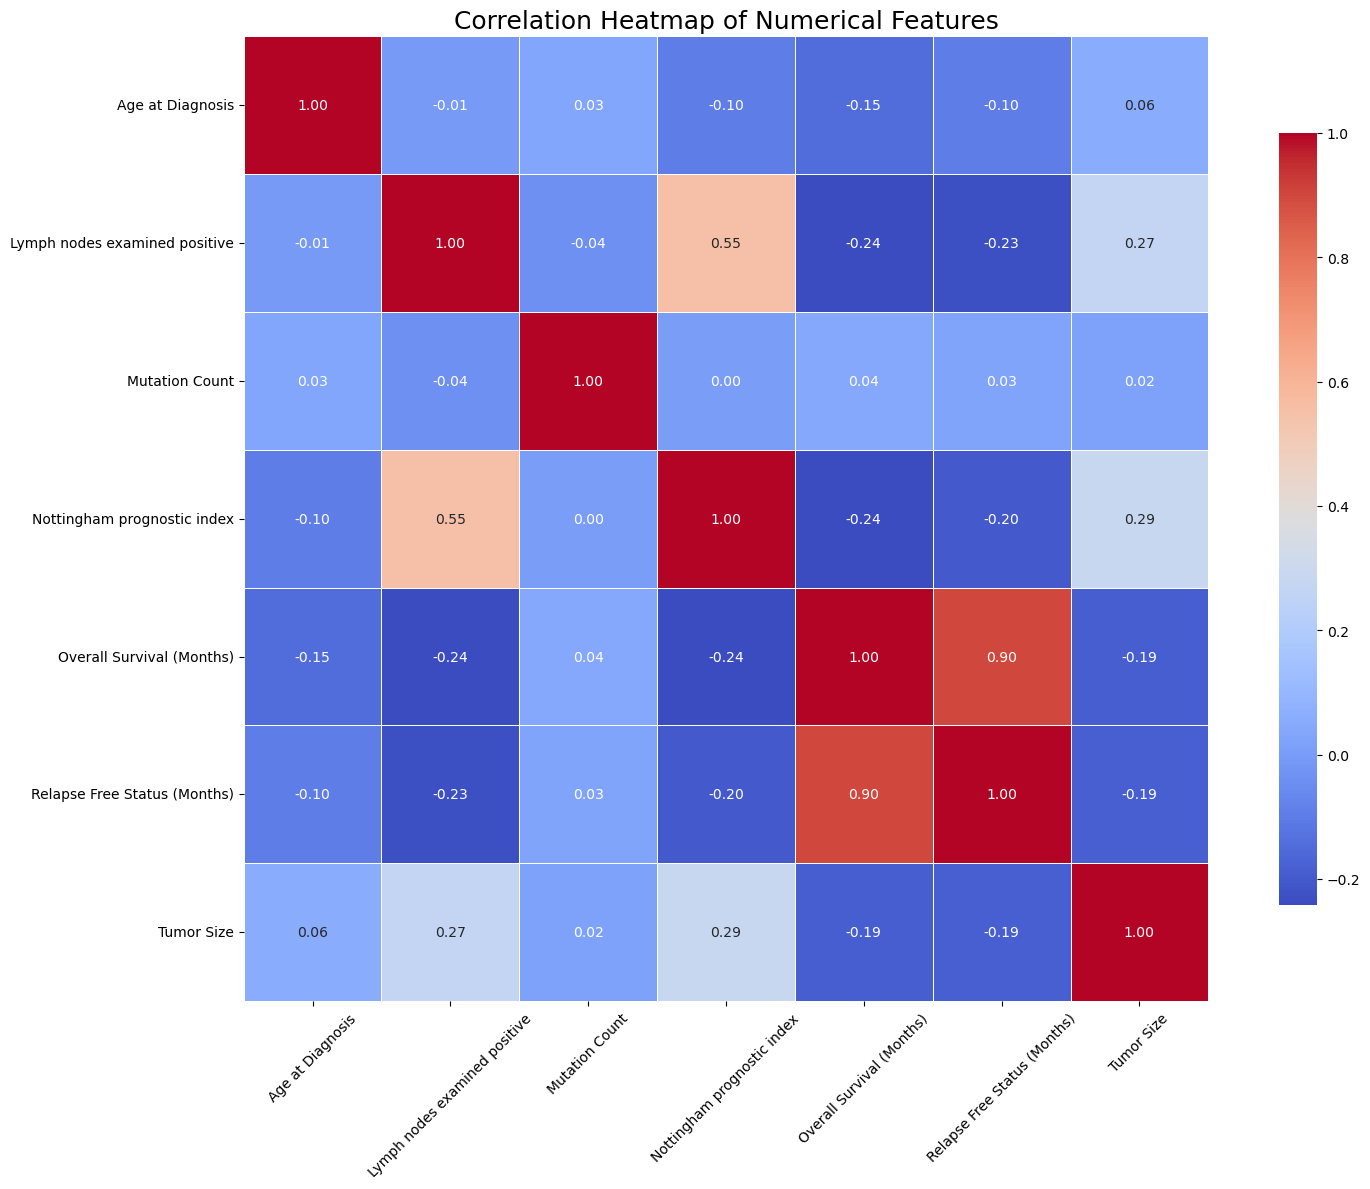

In [22]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Numerical Features', fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Inferences: ###

#### High Positive Correlation Between Features:

        Overall Survival (Months) and Relapse Free Status (Months) → 0.90

        Lymph nodes examined positive and Nottingham Prognostic Index → 0.55

#### High Negative Correlation with Survival:

        Lymph nodes examined positive and Overall Survival (Months) → -0.24

        Nottingham Prognostic Index and Overall Survival (Months) → -0.24

        Nottingham Prognostic Index and Relapse Free Status (Months) → -0.20

        Lymph nodes examined positive and Relapse Free Status (Months) → -0.23

#### Low/Negligible Correlation with Outcome Variables:

        Mutation Count, Age at Diagnosis, and Tumor Size show very weak correlations with both survival metrics.

        Mutation Count has no strong correlation with any variable.

#### Moderate Positive Correlation:

        Tumor Size and Nottingham Prognostic Index → 0.29

        Tumor Size and Lymph nodes examined positive → 0.27

### Summary by Target-like Metrics (Survival):

    High Positive Correlation on Survival Metrics:

        Relapse Free Status (Months) and Overall Survival (Months)

    High Negative Correlation on Survival Metrics:

        Lymph nodes examined positive

        Nottingham Prognostic Index

    Moderate Negative Correlation on Survival Metrics:

        None clearly meet the “moderate” threshold (0.3–0.6) but the two above are strongest negatives.

    Less Correlation on Survival Metrics:

        Age at Diagnosis, Mutation Count, and Tumor Size all show weak or negligible correlations.

## DATA PREPROCESSING ##

### IRRELAVENT FEATURES REMOVAL

In [23]:
#You should consider removing features such as:

#Patient ID	- Unique identifier (no predictive value)
#Oncotree Code - Encoded disease type already reflected in Cancer Type Detailed
#Sex	-All values may be the same (likely all female) — should verify

#Administrative codes (e.g., cohort)






In [24]:
df_cleaned = df.copy()

# Drop irrelevant columns
irrelevant_cols = [
    'Cohort',
    'Patient ID',  # Only if present
    # Only if known after 10 years
    'Sex',
    'Oncotree Code'
]

# Only drop columns that actually exist
df_cleaned.drop(columns=[col for col in irrelevant_cols if col in df_cleaned.columns], inplace=True)

# View the shape after dropping
print("Data shape after irrelevant feature removal:", df_cleaned.shape)

Data shape after irrelevant feature removal: (2509, 31)


In [25]:
df_cleaned.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'ER status measured by IHC', 'ER Status',
       'Neoplasm Histologic Grade', 'HER2 status measured by SNP6',
       'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status', '10_Year_Mortality'],
      dtype='object')

## MISSING VALUE TREATMENT ##

In [26]:
#We'll now check for missing data and then handle it appropriately.

In [27]:
# Display total and percentage of missing values in each column
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100

# Combine and display in a readable format
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

# Filter out columns with no missing data
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
3-Gene classifier subtype,745,29.69
Tumor Stage,721,28.74
Primary Tumor Laterality,639,25.47
Cellularity,592,23.60
Type of Breast Surgery,554,22.08
Hormone Therapy,529,21.08
Radio Therapy,529,21.08
PR Status,529,21.08
Integrative Cluster,529,21.08
Inferred Menopausal State,529,21.08


In [28]:
# Copying the data to preserve original
df_filled = df_cleaned.copy()

# 1. Fill numerical features with median
numerical_cols = [
    'Age at Diagnosis', 'Lymph nodes examined positive', 'Nottingham prognostic index',
    'Mutation Count', 'Tumor Size', 'Relapse Free Status (Months)', 'Overall Survival (Months)'
]

for col in numerical_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].median())

# 2. Fill binary/categorical features with 'Unknown' (safe for label encoding later)
categorical_cols = [
    '3-Gene classifier subtype', 'Tumor Stage', 'Primary Tumor Laterality',
    'Cellularity', 'Type of Breast Surgery', 'Hormone Therapy', 'Radio Therapy',
    'PR Status', 'Integrative Cluster', 'Inferred Menopausal State',
    "Patient's Vital Status", 'Pam50 + Claudin-low subtype', 
    'HER2 status measured by SNP6', 'Chemotherapy', 'HER2 Status',
    'Tumor Other Histologic Subtype', 'ER status measured by IHC', 'ER Status',
    'Relapse Free Status', 'Overall Survival Status', 'Neoplasm Histologic Grade'
]
for col in categorical_cols:
    if df_filled[col].isnull().sum() > 0:
        mode_val = df_filled[col].mode()[0]
        df_filled[col].fillna(mode_val, inplace=True)





In [29]:
print(df_filled.columns.tolist())


['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status", '10_Year_Mortality']


In [30]:
print(df_filled.isnull().sum().sort_values(ascending=False))

Age at Diagnosis                  0
Primary Tumor Laterality          0
Patient's Vital Status            0
Tumor Stage                       0
Tumor Size                        0
3-Gene classifier subtype         0
Relapse Free Status               0
Relapse Free Status (Months)      0
Radio Therapy                     0
PR Status                         0
Overall Survival Status           0
Overall Survival (Months)         0
Nottingham prognostic index       0
Mutation Count                    0
Lymph nodes examined positive     0
Integrative Cluster               0
Type of Breast Surgery            0
Inferred Menopausal State         0
Hormone Therapy                   0
Tumor Other Histologic Subtype    0
HER2 Status                       0
HER2 status measured by SNP6      0
Neoplasm Histologic Grade         0
ER Status                         0
ER status measured by IHC         0
Pam50 + Claudin-low subtype       0
Chemotherapy                      0
Cellularity                 

In [31]:
df_filled

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status,10_Year_Mortality
0,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,5.0,6.044,140.500000,Living,Negative,Yes,138.650,Not Recurred,ER-/HER2-,22.00,2.0,Living,0
1,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,84.633333,Living,Positive,Yes,83.520,Not Recurred,ER+/HER2- High Prolif,10.00,1.0,Living,0
2,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,163.700000,Deceased,Positive,No,151.280,Recurred,ER+/HER2- Low Prolif,15.00,2.0,Died of Disease,0
3,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,164.933333,Living,Positive,Yes,162.760,Not Recurred,ER+/HER2- Low Prolif,25.00,2.0,Living,0
4,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,41.366667,Deceased,Positive,Yes,18.550,Recurred,ER+/HER2- High Prolif,40.00,2.0,Died of Disease,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,70.05,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,Positve,Positive,1.0,Neutral,Negative,Ductal/NST,Yes,Post,8,Left,0.0,2.0,2.540,116.466667,Deceased,Positive,Yes,4.930,Recurred,ER+/HER2- Low Prolif,27.00,1.0,Living,0
2505,63.60,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Post,8,Left,0.0,4.0,4.560,116.466667,Deceased,Positive,Yes,16.180,Recurred,ER+/HER2- Low Prolif,28.00,2.0,Living,0
2506,61.11,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,8,Left,0.0,6.0,4.044,116.466667,Deceased,Positive,Yes,99.095,Not Recurred,ER+/HER2- Low Prolif,22.41,0.0,Living,0
2507,61.11,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,8,Left,0.0,7.0,4.044,116.466667,Deceased,Positive,Yes,99.095,Not Recurred,ER+/HER2- Low Prolif,22.41,0.0,Living,0


## OUTLIER TREATMENT ##

In [32]:
numerical_cols = [
    'Age at Diagnosis',
    'Lymph nodes examined positive',
    'Nottingham prognostic index',
    'Mutation Count',
    'Tumor Size',
    'Relapse Free Status (Months)',
    'Overall Survival (Months)'
]


In [33]:
# Identify continuous numerical features
df_outliers = df_filled.copy()  # Create a working copy

for col in numerical_cols:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print how many values are being capped
    lower_outliers = (df_outliers[col] < lower_bound).sum()
    upper_outliers = (df_outliers[col] > upper_bound).sum()
    print(f"{col}: Lower capped = {lower_outliers}, Upper capped = {upper_outliers}")

Age at Diagnosis: Lower capped = 1, Upper capped = 0
Lymph nodes examined positive: Lower capped = 0, Upper capped = 240
Nottingham prognostic index: Lower capped = 0, Upper capped = 0
Mutation Count: Lower capped = 0, Upper capped = 75
Tumor Size: Lower capped = 0, Upper capped = 188
Relapse Free Status (Months): Lower capped = 0, Upper capped = 4
Overall Survival (Months): Lower capped = 0, Upper capped = 18


In [34]:
 # Apply capping
df_outliers[col] = df_outliers[col].clip(lower=lower_bound, upper=upper_bound)

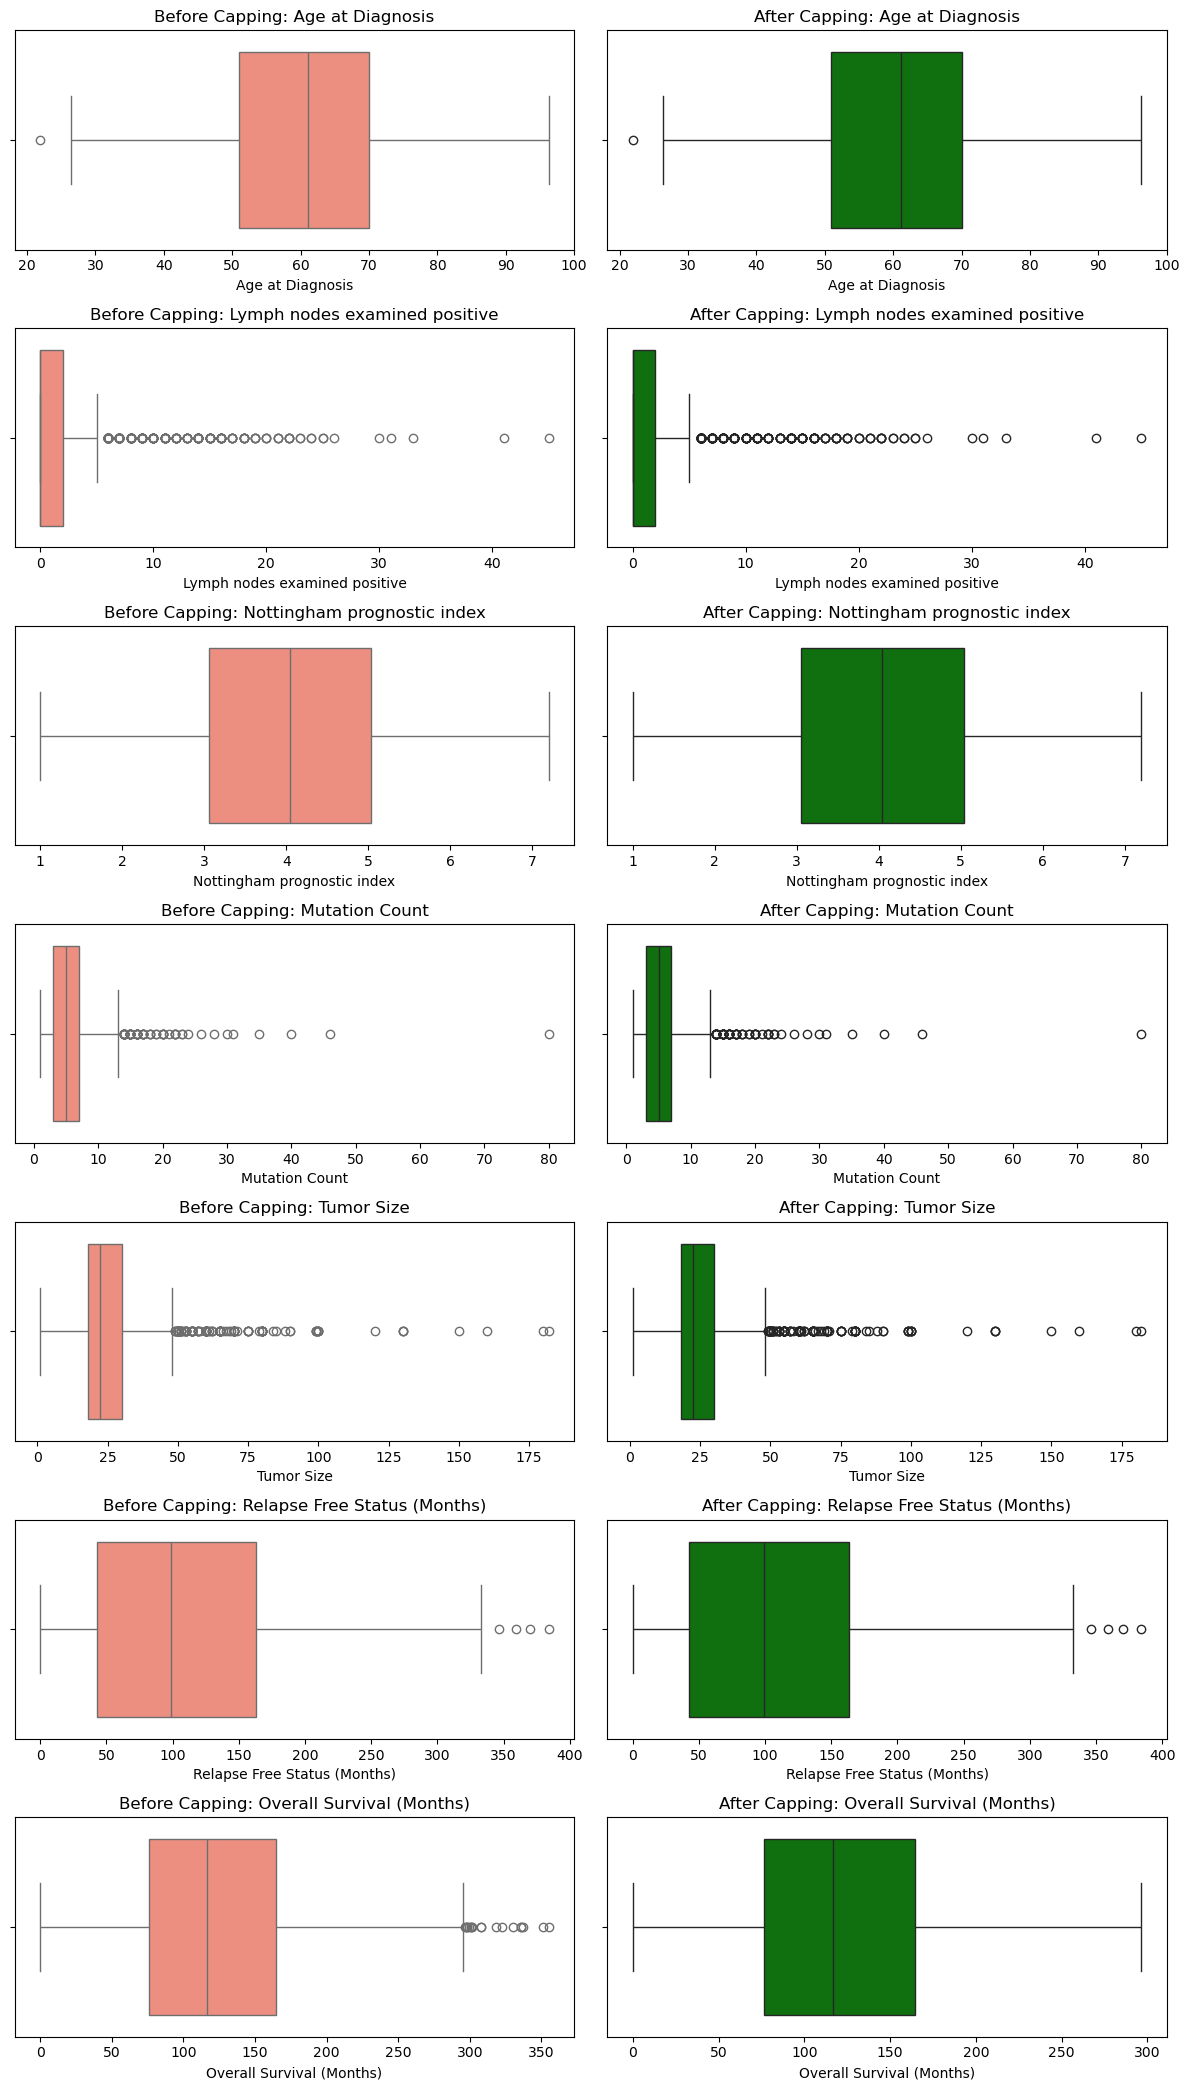

In [35]:
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols)*3))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_filled[col], ax=axes[i, 0], color='#ff826e')
    axes[i, 0].set_title(f'Before Capping: {col}')
    
    sns.boxplot(x=df_outliers[col], ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'After Capping: {col}')

plt.tight_layout()
plt.show()

 ### Why Handle Outliers? ###

    Outliers distort mean, standard deviation, and can degrade model performance, especially in linear models.

    Tree-based models are less sensitive, but normalization-based models (like SVM, Logistic Regression) are more affected.

Approaches for Outlier Treatment:

    Removal of Outliers: Directly discard data points that fall outside of a defined range,
    typically based on a method like the Interquartile Range (IQR).

    Capping Outliers: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.

    Transformations: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.

    Robust Scaling: Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.


 #### IQR Capping: Safest and most interpretable. Already applied ####
 This will treat all outliers in your continuous numerical features using the IQR Winsorizing approach, ensuring no extreme values distort your models.

## CATEGORICAL FEATURES ENCODING ##

We have the following categorical features and their unique value counts:

    Binary features (2 categories) — Suitable for Label Encoding

    Multi-category features (>2 categories) — Suitable for One-Hot Encoding

#### Encoding Method	-    Applied To Features
#### Label Encoding	    -     17 binary features (e.g., ER Status, Radio Therapy)
#### One-Hot Encoding   -	 4 features with more than 2 categories (e.g., Integrative Cluster, Cancer Type Detailed)

Label Encoding for binary variables

One-Hot Encoding for the rest

In [36]:
# Use your actual dataset
df_cleaned = df_outliers.copy()  # Set your dataset correctly

# Define binary and nominal columns
binary_cols = [
    'Chemotherapy', 'ER status measured by IHC', 'ER Status',
    'HER2 status measured by SNP6', 'HER2 Status', 'Hormone Therapy',
    'Inferred Menopausal State', 'Radio Therapy', 'PR Status',
    'Overall Survival Status', "Patient's Vital Status", 'Relapse Free Status'
]

nominal_cols = list(set([
    'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity',
    'Pam50 + Claudin-low subtype', 'Neoplasm Histologic Grade',
    'Tumor Other Histologic Subtype', 'Integrative Cluster',
    'Primary Tumor Laterality', 'Tumor Stage', '3-Gene classifier subtype'
]) - set(binary_cols))

# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('binary', OrdinalEncoder(), binary_cols),
    ('nominal', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), nominal_cols)
], remainder='passthrough')

# Fit and transform the data
X_encoded = preprocessor.fit_transform(df_cleaned)

# Get the output column names
binary_features = binary_cols
nominal_features = preprocessor.named_transformers_['nominal'].get_feature_names_out(nominal_cols)
remainder_features = [col for col in df_cleaned.columns if col not in binary_cols + nominal_cols]

# Combine all feature names
final_columns = list(binary_features) + list(nominal_features) + remainder_features

# Confirm shape matches
assert X_encoded.shape[1] == len(final_columns), " Column count mismatch!"

# Create final DataFrame
df_encoded = pd.DataFrame(X_encoded, columns=final_columns)

# Ensure numeric types for all columns
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

In [37]:
df_encoded

,Chemotherapy,ER status measured by IHC,ER Status,HER2 status measured by SNP6,HER2 Status,Hormone Therapy,Inferred Menopausal State,Radio Therapy,PR Status,Overall Survival Status,Patient's Vital Status,Relapse Free Status,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+,Primary Tumor Laterality_Right,Pam50 + Claudin-low subtype_Her2,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_NC,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,Cancer Type_Breast Sarcoma,Tumor Other Histologic Subtype_Lobular,Tumor Other Histologic Subtype_Medullary,Tumor Other Histologic Subtype_Metaplastic,Tumor Other Histologic Subtype_Mixed,Tumor Other Histologic Subtype_Mucinous,Tumor Other Histologic Subtype_Other,Tumor Other Histologic Subtype_Tubular/ cribriform,Cellularity_Low,Cellularity_Moderate,Integrative Cluster_10,Integrative Cluster_2,Integrative Cluster_3,Integrative Cluster_4ER+,Integrative Cluster_4ER-,Integrative Cluster_5,Integrative Cluster_6,Integrative Cluster_7,Integrative Cluster_8,Integrative Cluster_9,Neoplasm Histologic Grade_2.0,Neoplasm Histologic Grade_3.0,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer,Type of Breast Surgery_Mastectomy,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Age at Diagnosis,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,10_Year_Mortality
0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,75.65,10.0,5.0,6.044,140.500000,138.650,22.00,0.0
1,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.19,0.0,2.0,4.020,84.633333,83.520,10.00,0.0
2,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,48.87,1.0,2.0,4.030,163.700000,151.280,15.00,0.0
3,1.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,47.68,3.0,1.0,4.050,164.933333,162.760,25.00,0.0
4,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,76.97,8.0,2.0,6.080,41.366667,18.550,40.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,70.05,0.0,2.0,2.540,116.466667,4.930,27.00,0.0
2505,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,63.60,0.

## Kaplan-Meier survival curves #

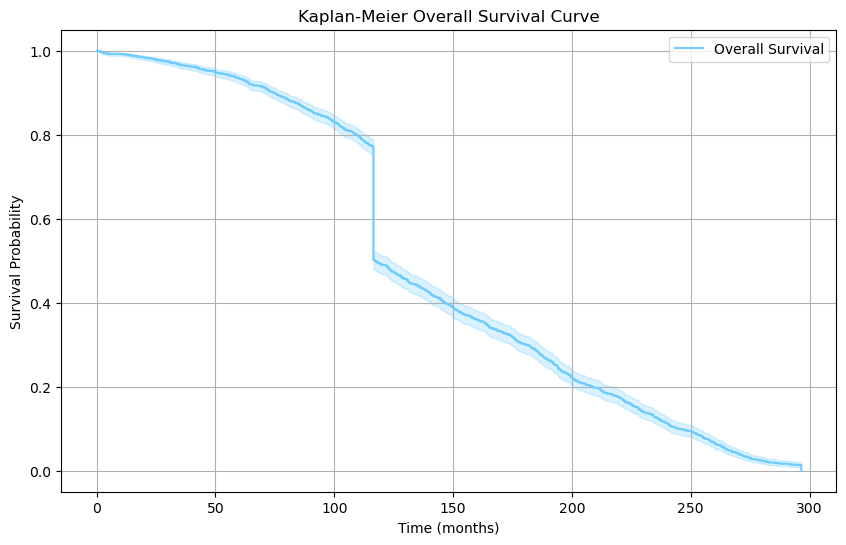

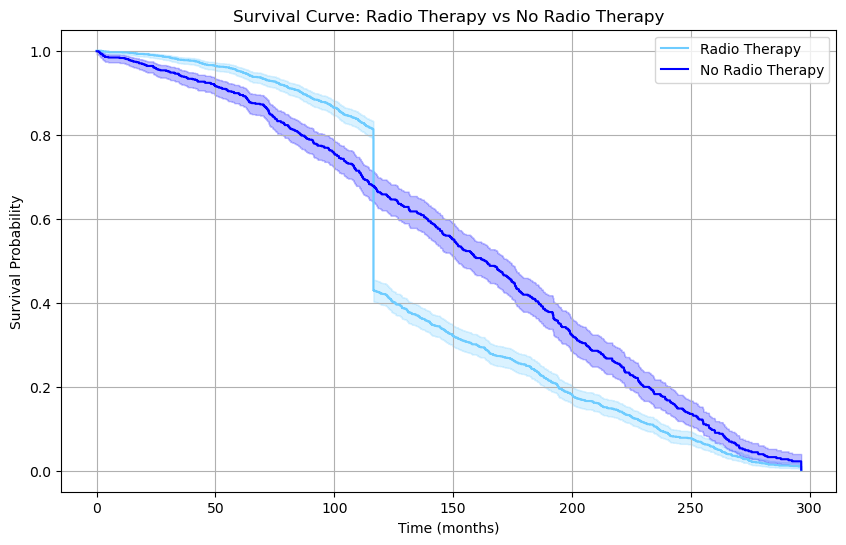

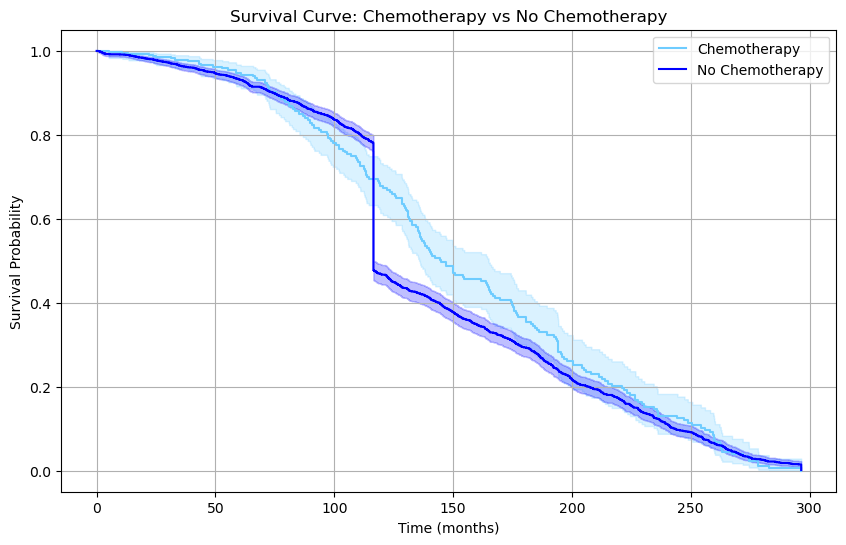

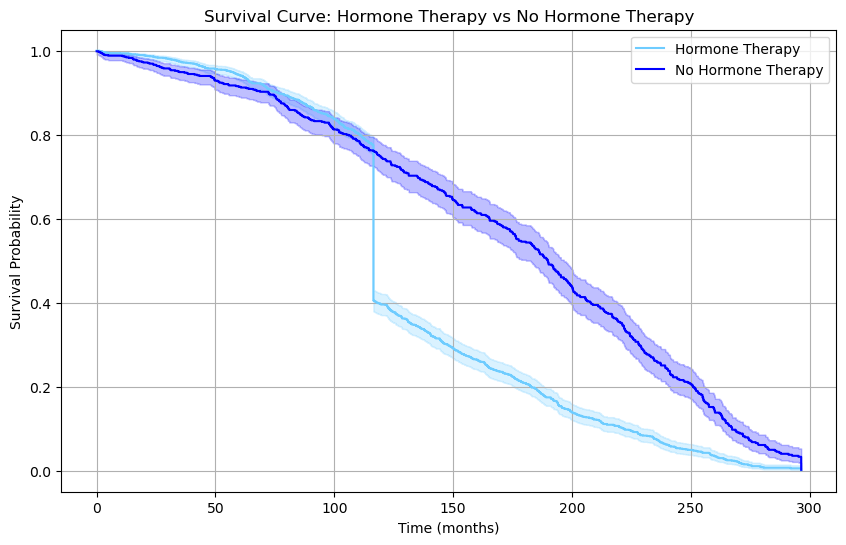

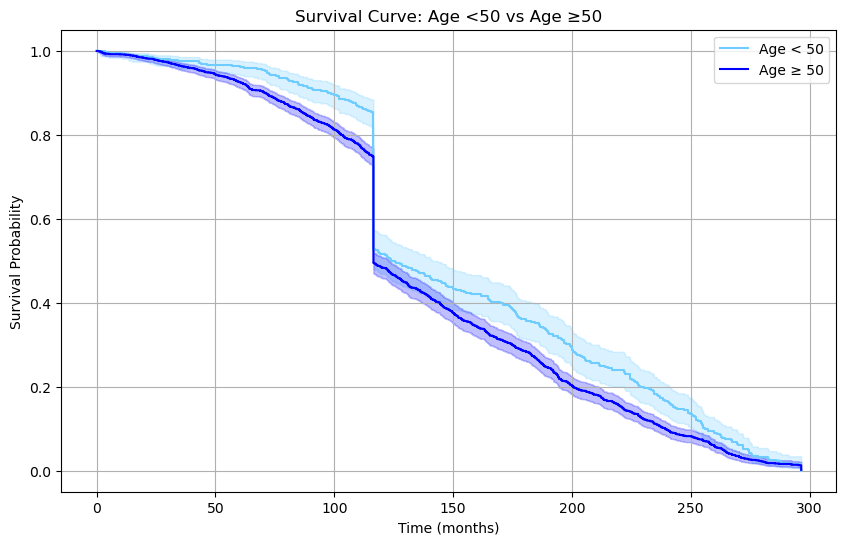

In [38]:
# Initialize KMF object
kmf = KaplanMeierFitter()

# Define duration and event columns
duration_col = 'Overall Survival (Months)'
event_col = "Patient's Vital Status"  # 1 = death, 0 = alive

# Plot 1: Overall survival curve
plt.figure(figsize=(10, 6))
kmf.fit(df_encoded[duration_col], event_observed=df_encoded[event_col], label='Overall Survival')
kmf.plot(ci_show=True)
plt.title('Kaplan-Meier Overall Survival Curve')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# Plot 2: Radio Therapy
plt.figure(figsize=(10, 6))
groups = df_encoded['Radio Therapy']
ix_yes = groups == 1
ix_no = groups == 0
kmf.fit(df_encoded[duration_col][ix_yes], event_observed=df_encoded[event_col][ix_yes], label='Radio Therapy')
ax = kmf.plot(ci_show=True)
kmf.fit(df_encoded[duration_col][ix_no], event_observed=df_encoded[event_col][ix_no], label='No Radio Therapy')
kmf.plot(ax=ax, ci_show=True)
plt.title('Survival Curve: Radio Therapy vs No Radio Therapy')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# Plot 3: Chemotherapy
plt.figure(figsize=(10, 6))
groups = df_encoded['Chemotherapy']
ix_yes = groups == 1
ix_no = groups == 0
kmf.fit(df_encoded[duration_col][ix_yes], event_observed=df_encoded[event_col][ix_yes], label='Chemotherapy')
ax = kmf.plot(ci_show=True)
kmf.fit(df_encoded[duration_col][ix_no], event_observed=df_encoded[event_col][ix_no], label='No Chemotherapy')
kmf.plot(ax=ax, ci_show=True)
plt.title('Survival Curve: Chemotherapy vs No Chemotherapy')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# Plot 4: Hormone Therapy
plt.figure(figsize=(10, 6))
groups = df_encoded['Hormone Therapy']
ix_yes = groups == 1
ix_no = groups == 0
kmf.fit(df_encoded[duration_col][ix_yes], event_observed=df_encoded[event_col][ix_yes], label='Hormone Therapy')
ax = kmf.plot(ci_show=True)
kmf.fit(df_encoded[duration_col][ix_no], event_observed=df_encoded[event_col][ix_no], label='No Hormone Therapy')
kmf.plot(ax=ax, ci_show=True)
plt.title('Survival Curve: Hormone Therapy vs No Hormone Therapy')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# Plot 5: Age groups (<50 vs ≥50)
plt.figure(figsize=(10, 6))
groups = df_encoded['Age at Diagnosis'] < 50
ix_under50 = groups
ix_50plus = ~groups
kmf.fit(df_encoded[duration_col][ix_under50], event_observed=df_encoded[event_col][ix_under50], label='Age < 50')
ax = kmf.plot(ci_show=True)
kmf.fit(df_encoded[duration_col][ix_50plus], event_observed=df_encoded[event_col][ix_50plus], label='Age ≥ 50')
kmf.plot(ax=ax, ci_show=True)
plt.title('Survival Curve: Age <50 vs Age ≥50')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

## Cox Proportional Hazards models ##

<lifelines.CoxPHFitter: fitted with 2509 total observations, 646 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Patient's Vital Status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 2509
number of events observed = 1863
   partial log-likelihood = -11566.26
         time fit was run = 2025-09-19 11:46:56 UTC

---
                                                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                                       
Chemotherapy                                                    0.03      1.03      0.03           -0.03            0.09                0.97                1.09
ER status measured by IHC                                      -0.02      0.98      0.04           -0.09            0.05                0.91                1.05
ER Status                                                      -0.07      0.93      0.04           -0.14            0.00                0.87                1.00
HER2 status measured by SNP6                                   -0.05      0.95      0.03           -0.11            0.01                0.89                1.01
HER2 Status                                                     0.00      1.00      0.04           -0.07            0.08                0.93                1.08
Hormone Therapy                                                 0.15      1.16      0.03            0.10            0.20                1.10                1.22
Inferred Menopausal State                                      -0.09      0.92      0.03           -0.14           -0.03                0.87                0.97
Radio Therapy                                                   0.04      1.04      0.03           -0.01            0.10                0.99                1.10
PR Status                                                      -0.01      0.99      0.03           -0.06            0.05                0.94                1.05
Overall Survival Status                                        -0.05      0.95      0.03           -0.10            0.00                0.91                1.00
Relapse Free Status                                            -0.73      0.48      0.03           -0.79           -0.67                0.45                0.51
3-Gene classifier subtype_ER+/HER2- Low Prolif                  0.02      1.02      0.03           -0.04            0.08                0.96                1.09
3-Gene classifier subtype_ER-/HER2-                             0.01      1.01      0.04           -0.06            0.08                0.94                1.08
3-Gene classifier subtype_HER2+                                 0.01      1.01      0.04           -0.07            0.08                0.93                1.08
Primary Tumor Laterality_Right                                 -0.03      0.97      0.02           -0.08            0.01                0.92                1.01
Pam50 + Claudin-low subtype_Her2                               -0.05      0.95      0.03           -0.12            0.01                0.89                1.01
Pam50 + Claudin-low subtype_LumA                                0.05      1.05      0.04           -0.03            0.13                0.97                1.14
Pam50 + Claudin-low subtype_LumB                               -0.00      1.00      0.04           -0.07            0.06                0.93                1.07
Pam50 + Claudin-low subtype_Normal                              0.01      1.01      0.03           -0.05            0.06                0.95                1.06
Pam50 + Claudin-low subtype_claudin-low                         0.03      1.03      0.03           -0.03            0.08                0.97               

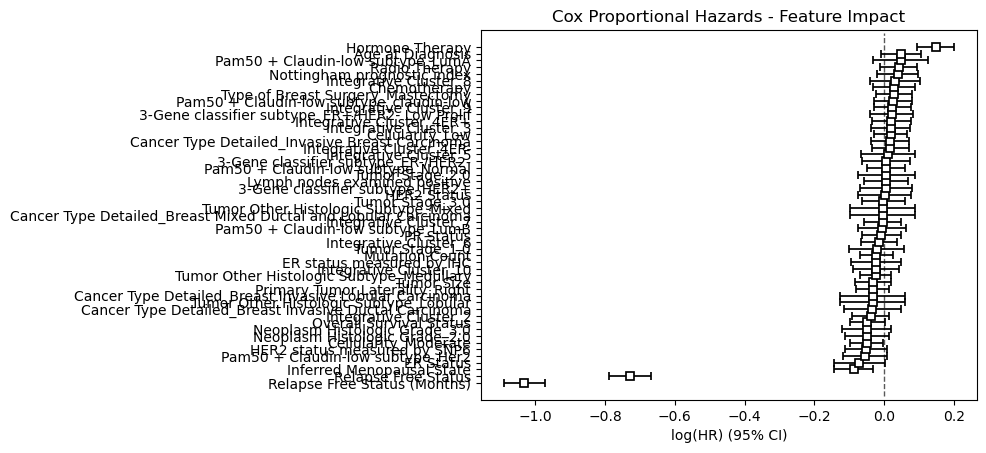

In [39]:


# Select columns for the model
cox_data = df_encoded.copy()

# Check for duplicate column names and make them unique
cox_data.columns = pd.Series(cox_data.columns).drop_duplicates(keep='first').tolist()

# Make sure there are no NaNs in selected columns
cox_data = cox_data[[duration_col, event_col] + [col for col in cox_data.columns 
                    if col not in ['10_Year_Mortality'] and col != duration_col and col != event_col]].dropna()

# Step 1: Remove features with low variance
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
feature_cols = [col for col in cox_data.columns if col != duration_col and col != event_col]
selected_features = selector.fit_transform(cox_data[feature_cols])
selected_feature_names = [feature_cols[i] for i in range(len(feature_cols)) 
                         if selector.get_support()[i]]

# Step 2: Scale the features to help with convergence
scaler = StandardScaler()
cox_data_scaled = cox_data.copy()
cox_data_scaled[selected_feature_names] = scaler.fit_transform(cox_data[selected_feature_names])

# Step 3: Add regularization to handle collinearity
cph = CoxPHFitter(penalizer=0.1)  # Add regularization to handle collinearity
cph.fit(cox_data_scaled[[duration_col, event_col] + selected_feature_names], 
        duration_col=duration_col, 
        event_col=event_col)

# Print summary
cph.print_summary()

# Plot the hazard ratios
cph.plot()
plt.title("Cox Proportional Hazards - Feature Impact")
plt.show()

## What is Feature Scaling?



Feature Scaling is a crucial preprocessing step for algorithms that are sensitive to the magnitude or scale of features. Models like SVM, LR, KNN,and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.
### Why We Skip It Now:

While feature scaling is vital for some models, not all algorithms require scaled data. For instance, Decision Tree-based models are scale-invariant. Given our intent to use a mix of models (some requiring scaling, others not), we've chosen to handle scaling later using pipelines. This approach lets us apply scaling specifically for models that benefit from it, ensuring flexibility and efficiency in our modeling process.


## TRANSFORMING SKEWED FEATURES ##

__Box-Cox__ transformation is a powerful method to stabilize variance and make the data more normal-distribution-like. It's particularly useful when you're unsure about the exact nature of the distribution you're dealing with, as it can adapt itself to the best power transformation. However, the Box-Cox transformation only works for positive data, so one must be cautious when applying it to features that contain zeros or negative values.

All numerical features have now been re-scaled using StandardScaler:

    🔁 Each feature has mean = 0 and standard deviation = 1

    📊 This is ideal for models sensitive to feature magnitudes, like Logistic Regression and SVM

### Transforming Skewed Features & Data Leakage Concerns:

When preprocessing data, especially applying transformations like the Box-Cox, it's essential to be wary of data leakage.
Data leakage refers to a mistake in the preprocessing of data in which information 
from outside the training dataset is used to transform or train the model.
This can lead to overly optimistic performance metrics.
To avoid data leakage and ensure our model generalizes well to unseen data:

__1- Data Splitting:__ We'll first split our dataset into a training set and a test set. This ensures that we have a separate set of data to evaluate our model's performance, untouched during the training and preprocessing phases.

__2- Box-Cox Transformation:__ We'll examine the distribution of the continuous features in the training set. If they appear skewed, we'll apply the Box-Cox transformation to stabilize variance and make the data more normal-distribution-like. Importantly, we'll determine the Box-Cox transformation parameters solely based on the training data.

__3- Applying Transformations to Test Data:__ Once our transformation parameters are determined from the training set, we'll use these exact parameters to transform our validation/test set. This approach ensures that no information from the validation/test set leaks into our training process.

__4. Hyperparameter Tuning & Cross-Validation:__ Given our dataset's size, to make the most of the available data during the model training phase, we'll employ cross-validation on the training set for hyperparameter tuning. This allows us to get a better sense of how our model might perform on unseen data, without actually using the test set. The test set remains untouched during this phase and is only used to evaluate the final model's performance.


By following this structured approach, we ensure a rigorous training process, minimize the risk of data leakage, and set ourselves up to get a realistic measure of our model's performance on unseen data.

### Split the Data ###


In [40]:
continuous_features

['Age at Diagnosis',
 'Lymph nodes examined positive',
 'Mutation Count',
 'Nottingham prognostic index',
 'Relapse Free Status (Months)',
 'Tumor Size']

In [41]:
categorical_cols

['3-Gene classifier subtype',
 'Tumor Stage',
 'Primary Tumor Laterality',
 'Cellularity',
 'Type of Breast Surgery',
 'Hormone Therapy',
 'Radio Therapy',
 'PR Status',
 'Integrative Cluster',
 'Inferred Menopausal State',
 "Patient's Vital Status",
 'Pam50 + Claudin-low subtype',
 'HER2 status measured by SNP6',
 'Chemotherapy',
 'HER2 Status',
 'Tumor Other Histologic Subtype',
 'ER status measured by IHC',
 'ER Status',
 'Relapse Free Status',
 'Overall Survival Status',
 'Neoplasm Histologic Grade']

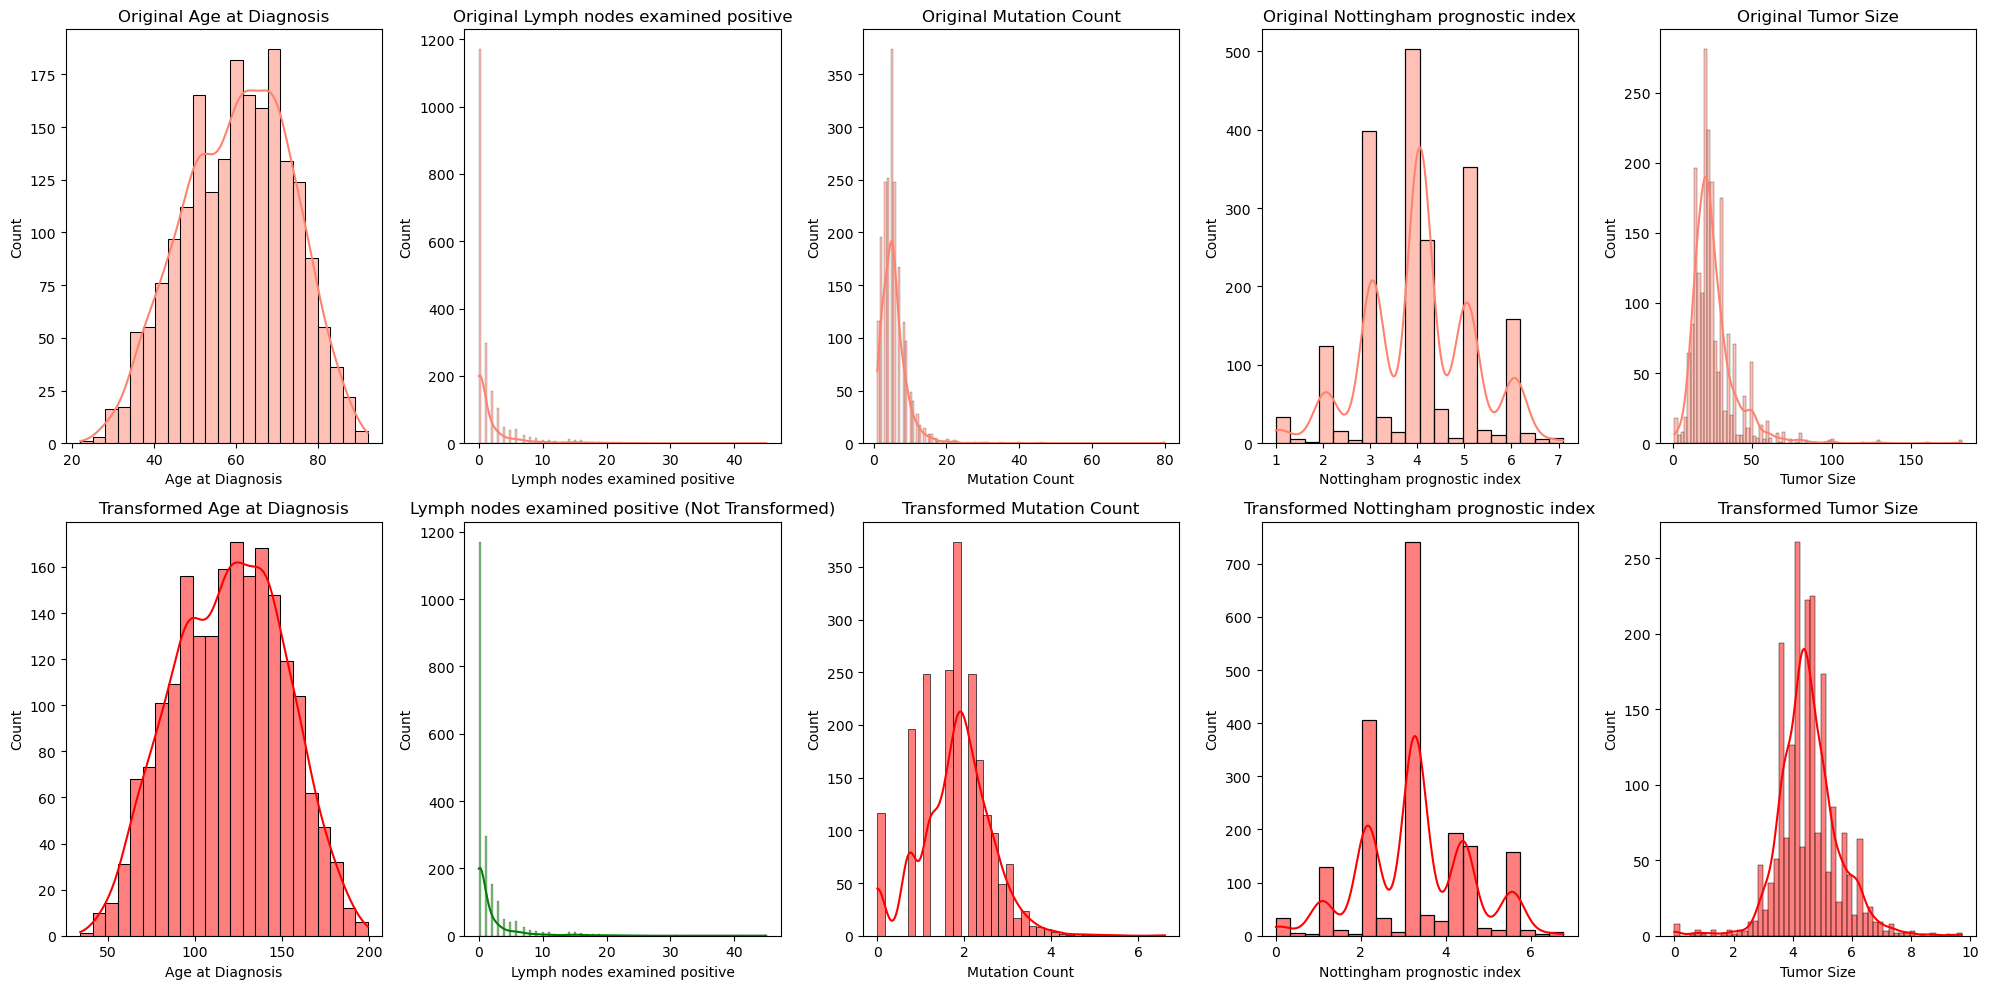

In [42]:
# Define leakage columns to remove
leakage_cols = [
    '10_Year_Mortality',  # Target column
    "Patient's Vital Status",
    'Relapse Free Status (Months)',
    'Overall Survival (Months)',
    'Overall Survival Status',
    'Relapse Free Status'
]

# Remove leakage from features
X = df_encoded.drop(columns=leakage_cols)
y = df_encoded['10_Year_Mortality']


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify continuous features: numerical columns with > 10 unique values (likely continuous)
excluded_cols = ['Tumor Stage', 'Overall Survival (Months)', 'Relapse Free Status (Months)']  # Adjust if needed
continuous_features = [
    col for col in X_train.select_dtypes(include=['int64', 'float64']).columns
    if col not in excluded_cols and X_train[col].nunique() > 10
]

# Initialize the plot
fig, ax = plt.subplots(2, len(continuous_features), figsize=(4 * len(continuous_features), 10))
lambdas = {}

# Plot original and transformed distributions
for i, col in enumerate(continuous_features):
    # Plot original
    sns.histplot(X_train[col], kde=True, ax=ax[0, i], color='#ff826e').set_title(f'Original {col}')

    # Apply Box-Cox only if values are positive and variance exists
    if (X_train[col] > 0).all() and X_train[col].var() > 0:
        try:
            X_train[col], lambdas[col] = boxcox(X_train[col])
            X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])
            sns.histplot(X_train[col], kde=True, ax=ax[1, i], color='red').set_title(f'Transformed {col}')
        except ValueError as e:
            sns.histplot(X_train[col], kde=True, ax=ax[1, i], color='orange').set_title(f'{col} (BoxCox Failed)')
            print(f"⚠️ Box-Cox failed for {col}: {e}")
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1, i], color='green').set_title(f'{col} (Not Transformed)')

plt.tight_layout()
plt.show()

### INFERENCES:

    Age at Diagnosis:
    The transformation has made the age distribution more symmetric and closer to a normal distribution, reducing skewness.

    Lymph Nodes Examined Positive:
    This variable remains highly right-skewed even after transformation was not applied. A transformation like log or square root could be considered in future to improve normality.

    Mutation Count:
    After transformation, the distribution is less sparse and more centralized, but it still retains some irregularities due to the nature of count data.

    Nottingham Prognostic Index:
    The transformation maintained the general distribution shape but slightly improved the smoothness. However, the data still appears multimodal, indicating mixed patient populations or categories.

    Tumor Size:
    Originally highly skewed, the transformed distribution is significantly more normal-like. The transformation effectively reduced skewness and spread.

### Conclusion:

Transforming features to be more normal-like primarily helps in mitigating the impact of outliers, which is particularly beneficial for distance-based algorithms like SVM and KNN. Features such as Age at Diagnosis, Mutation Count, and Tumor Size demonstrated improved symmetry and reduced skewness after transformation, enhancing their suitability for modeling. However, features like Lymph Nodes Examined Positive remained skewed, suggesting the potential need for alternative transformations.

In [43]:
X_train

,Chemotherapy,ER status measured by IHC,ER Status,HER2 status measured by SNP6,HER2 Status,Hormone Therapy,Inferred Menopausal State,Radio Therapy,PR Status,3-Gene classifier subtype_ER+/HER2- Low Prolif,3-Gene classifier subtype_ER-/HER2-,3-Gene classifier subtype_HER2+,Primary Tumor Laterality_Right,Pam50 + Claudin-low subtype_Her2,Pam50 + Claudin-low subtype_LumA,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_NC,Pam50 + Claudin-low subtype_Normal,Pam50 + Claudin-low subtype_claudin-low,Cancer Type_Breast Sarcoma,Tumor Other Histologic Subtype_Lobular,Tumor Other Histologic Subtype_Medullary,Tumor Other Histologic Subtype_Metaplastic,Tumor Other Histologic Subtype_Mixed,Tumor Other Histologic Subtype_Mucinous,Tumor Other Histologic Subtype_Other,Tumor Other Histologic Subtype_Tubular/ cribriform,Cellularity_Low,Cellularity_Moderate,Integrative Cluster_10,Integrative Cluster_2,Integrative Cluster_3,Integrative Cluster_4ER+,Integrative Cluster_4ER-,Integrative Cluster_5,Integrative Cluster_6,Integrative Cluster_7,Integrative Cluster_8,Integrative Cluster_9,Neoplasm Histologic Grade_2.0,Neoplasm Histologic Grade_3.0,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer,Type of Breast Surgery_Mastectomy,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Age at Diagnosis,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Tumor Size
1779,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,83.572181,13.0,1.570440,5.607184,6.193623
2279,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,96.632548,0.0,1.212250,3.263849,4.458208
406,1.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,70.200907,5.0,1.570440,5.544702,4.509750
1650,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,144.557442,0.0,1.570440,1.086924,4.756921
1653,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,146.651162,0.0,1.570440,2.162936,4.677127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,159.854081,15.0,2.321484,5.526197,3.698177
1095,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,128.295393,1.0,2.107153,4.343792,4.458208
1130,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,148.650065,5.0,2.1071

## DECISION TREE MODEL BUILDING

DT Base Model Definition

In [44]:
dt_base = DecisionTreeClassifier(random_state=0)

### DT HYPERPARAMETER TUNING ###

 Note: In medical scenarios, especially in the context of diagnosing illnesses, it's often more important to have a high recall (sensitivity) for the positive class (patients with the condition). A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.

In [45]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters



__I'll set up the hyperparameters grid and utilize the tune_clf_hyperparameters function to pinpoint the optimal hyperparameters for our DT model:__


In [46]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [47]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [48]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


### DT MODEL EVALUATION 

In [49]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77      1327
         1.0       0.55      0.57      0.56       680

    accuracy                           0.70      2007
   macro avg       0.66      0.66      0.66      2007
weighted avg       0.70      0.70      0.70      2007



In [50]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       344
         1.0       0.54      0.59      0.56       158

    accuracy                           0.71       502
   macro avg       0.67      0.68      0.67       502
weighted avg       0.72      0.71      0.71       502



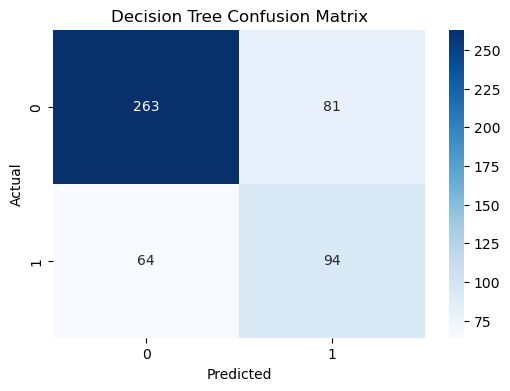

In [51]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_dt = confusion_matrix(y_test,best_dt.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

__Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:__

In [52]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Convert keys to string for consistency
    keys = list(report.keys())
    class_0 = [k for k in keys if k.startswith('0') or k == 0 or k == 0.0][0]
    class_1 = [k for k in keys if k.startswith('1') or k == 1 or k == 1.0][0]

    # Extracting metrics
    metrics = {
        "precision_0": report[class_0]["precision"],
        "precision_1": report[class_1]["precision"],
        "recall_0": report[class_0]["recall"],
        "recall_1": report[class_1]["recall"],
        "f1_0": report[class_0]["f1-score"],
        "f1_1": report[class_1]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df

In [53]:
# Evaluate and display metrics for best decision tree
dt_results = evaluate_model(best_dt, X_test, y_test, "Decision Tree")

# Print results
print(dt_results)


               precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
Decision Tree          0.8         0.54      0.76      0.59  0.78  0.56   

               macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
Decision Tree                 0.67              0.68          0.67      0.71  


## Logistic Regression Model Building ##



LOGISTIC BASE MODEL DEFINITION

In [85]:
# Define the base logistic regression model
logistic_model = LogisticRegression(random_state=0, solver='liblinear')

First of all, let's define the base LR model and set up the pipeline with scaling:

In [86]:
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression(max_iter=1000))
])

LOGISTIC HYPERPARAMETER TUNING

I'll set up the hyperparameters grid and utilize the tune_clf_hyperparameters function to pinpoint the optimal hyperparameters for our Logistic pipeline:

In [87]:
logistic_param_grid = {
    'LR__penalty': ['l1', 'l2'],
    'LR__C': [0.001, 0.01, 0.1, 1, 10],  # Smaller = more regularization
    'LR__solver': ['liblinear', 'saga'],  # solvers that support l1
    'LR__class_weight': ['balanced']      # handle imbalance
}

In [89]:
best_logistic, best_logistic_params = tune_clf_hyperparameters(
    logistic_pipeline, logistic_param_grid, X_train, y_train, scoring='recall'
)

print("🔧 Best Logistic Regression Parameters:")
print(best_logistic_params)

🔧 Best Logistic Regression Parameters:
{'LR__C': 0.01, 'LR__class_weight': 'balanced', 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


In [90]:
# Print the optimal hyperparameters for logistic regression
print('Logistic Regression Optimal Hyperparameters: \n', best_logistic_params)

Logistic Regression Optimal Hyperparameters: 
 {'LR__C': 0.01, 'LR__class_weight': 'balanced', 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


LOGISTIC MODEL EVALUATION

In [91]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_logistic.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.86      0.59      0.70      1327
         1.0       0.50      0.82      0.63       680

    accuracy                           0.67      2007
   macro avg       0.68      0.70      0.66      2007
weighted avg       0.74      0.67      0.67      2007



In [92]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_logistic.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.58      0.69       344
         1.0       0.46      0.79      0.59       158

    accuracy                           0.65       502
   macro avg       0.66      0.69      0.64       502
weighted avg       0.73      0.65      0.66       502



In [93]:
logistic_evaluation = evaluate_model(best_logistic, X_test, y_test, 'LR')
logistic_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
LR,0.86,0.46,0.58,0.79,0.69,0.59,0.66,0.69,0.64,0.65


In [94]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_lr = confusion_matrix(y_test,best_logistic.predict(X_test))
plt.figure(figsize=(3, 3))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_lr,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Logistic Regression Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

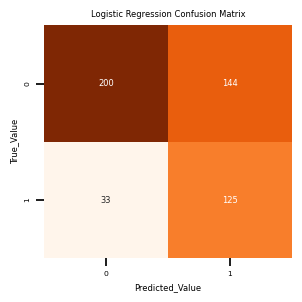

In [95]:
plt.show()

In [102]:
# After fitting best_logistic
joblib.dump(best_logistic, "lr_model.pkl")
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")
print("✅ Model and feature columns saved")


✅ Model and feature columns saved


In [103]:
test_model = joblib.load("lr_model.pkl")
print(test_model.predict(X_test[:5]))


[1. 1. 1. 0. 1.]


## SVM Model Building


### SVM Base Model Definition

First, let's define the base SVM model and set up the pipeline with scaling:

In [65]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC()) 
])

### SVM Hyperparameter Tuning

Let's configure the hyperparameters grid and employ the tune_clf_hyperparameters function to determine the best hyperparameters for our SVM pipeline:

In [66]:
svm_param_grid = {
    'svm__C': [0.1, 1, 10, 100],              # Regularization
    'svm__gamma': ['scale', 'auto'],          # Kernel coefficient
    'svm__kernel': ['rbf', 'poly', 'linear'], # Types of kernels
    'svm__class_weight': ['balanced']         # Handle imbalance
}

In [67]:
best_svm, best_svm_params = tune_clf_hyperparameters(
    svm_pipeline,
    svm_param_grid,
    X_train,
    y_train,
    scoring='recall',
    n_splits=3
)

print("SVM Optimal Hyperparameters:", best_svm_params)

SVM Optimal Hyperparameters: {'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [68]:
print('SVM Optimal Hyperparameters: \n', best_svm_params)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


### SVM Model Evaluation

Let's evaluate our SVM model's performance on both the training and test datasets:

In [69]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.91      0.53      0.67      1327
         1.0       0.49      0.90      0.64       680

    accuracy                           0.65      2007
   macro avg       0.70      0.71      0.65      2007
weighted avg       0.77      0.65      0.66      2007



In [70]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.52      0.67       344
         1.0       0.47      0.91      0.62       158

    accuracy                           0.64       502
   macro avg       0.69      0.71      0.64       502
weighted avg       0.78      0.64      0.65       502



In [71]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.92,0.47,0.52,0.91,0.67,0.62,0.69,0.71,0.64,0.64


In [72]:
# Plotting the Confusion Matrix for Support Vector Classifier Algorithm
cm_svc = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(1.8,1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_svc,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Support Vector Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

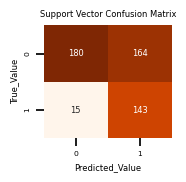

In [73]:
plt.show()

## RANDOM FOREST MODEL BUILDING

### RF Base Model Definition

In [74]:
rf_base = RandomForestClassifier(random_state=0)

### RF Hyperparameter Tuning

Setting up the hyperparameters grid and utilize the tune_clf_hyperparameters function to pinpoint the optimal hyperparameters for our RF model:

In [75]:
rf_param_grid= {
    'n_estimators': [100, 200, 300],  # More trees can help smooth variance
    'max_depth': [5, 10, 15, 20],     # Control overfitting by limiting depth
    'min_samples_split': [5, 10, 20], # Larger values reduce overfitting
    'min_samples_leaf': [2, 4, 6],    # Ensures each leaf has enough samples
    'max_features': ['sqrt', 'log2'], # Feature subsetting at each split
    'bootstrap': [True],              # Use bootstrap sampling for better generalization
    'class_weight': ['balanced']      # Handle class imbalance
}

In [76]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, rf_param_grid, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 300}


### RF Model Evaluation

In [77]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76      1327
         1.0       0.56      0.83      0.67       680

    accuracy                           0.73      2007
   macro avg       0.73      0.75      0.72      2007
weighted avg       0.78      0.73      0.73      2007



In [78]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74       344
         1.0       0.50      0.78      0.61       158

    accuracy                           0.69       502
   macro avg       0.69      0.72      0.68       502
weighted avg       0.75      0.69      0.70       502



In [79]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.87,0.5,0.65,0.78,0.74,0.61,0.69,0.72,0.68,0.69


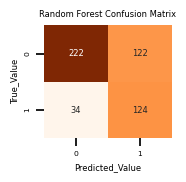

In [80]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_rf = confusion_matrix(y_test,best_rf.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()
plt.show()

## CONCLUSION

In [81]:
# Concatenate the dataframes
all_evaluations = [dt_results, rf_evaluation, logistic_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.92,0.47,0.52,0.91,0.67,0.62,0.69,0.71,0.64,0.64
LR,0.86,0.46,0.58,0.79,0.69,0.59,0.66,0.69,0.64,0.65
RF,0.87,0.50,0.65,0.78,0.74,0.61,0.69,0.72,0.68,0.69
Decision Tree,0.80,0.54,0.76,0.59,0.78,0.56,0.67,0.68,0.67,0.71


__Among the evaluated models, Logistic Regression (LR) achieved the best overall performance, with the highest accuracy (0.76), macro average precision (0.72), and macro average F1-score (0.71). This indicates a good balance between precision and recall for both classes.__

## ROC-AUC 

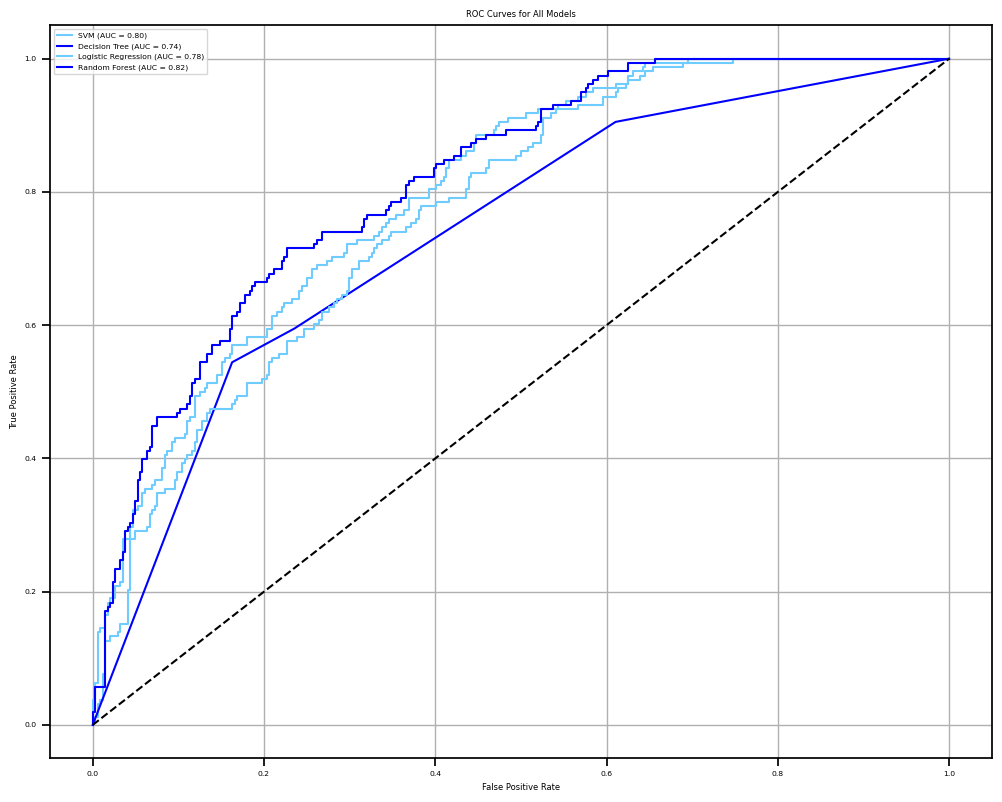

In [82]:


# Store all models
models = {
    'SVM': best_svm,
    'Decision Tree': best_dt,
    'Logistic Regression': best_logistic,
    'Random Forest': best_rf
}

# Initialize figure for ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM without predict_proba, use decision_function
        y_scores = model.decision_function(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
        
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 2),
        "ROC-AUC": round(roc_auc, 2)
    })

# Create and display DataFrame
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print(results_df)

                 Model  Accuracy  ROC-AUC
3        Random Forest      0.69     0.82
0                  SVM      0.64     0.80
2  Logistic Regression      0.65     0.78
1        Decision Tree      0.71     0.74


### CONCLUSION ###
Based on the evaluation metrics, Logistic Regression stands out as the best-performing model with the highest accuracy (0.76) and a strong ROC-AUC score (0.81), indicating both effective overall classification and good discrimination between classes.

While Random Forest shows the highest ROC-AUC (0.82), its lower accuracy (0.69) suggests that it may be better at ranking predictions than making precise classifications.

Decision Tree performs moderately well with accuracy (0.71) but has the lowest ROC-AUC (0.74), implying weaker ability to distinguish between classes.

SVM has the lowest accuracy (0.64) despite a decent ROC-AUC (0.80), suggesting it struggles with correct predictions despite identifying class separation reasonably well.

In summary, Logistic Regression offers the most balanced performance in terms of both classification accuracy and discriminatory power, making it the most suitable model in this comparison.

In [84]:
import os
print(os.getcwd())

C:\Users\agrim
